#### [lab 1 parser](https://github.com/itmo-ml-lab-ML-course/parser-misirlouuu/)

In [156]:
import warnings

from sklearn.preprocessing import StandardScaler, MinMaxScaler

warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import stats
from category_encoders.binary import BinaryEncoder

In [80]:
mpl.style.use(['ggplot'])

In [81]:
df = pd.read_csv("cian flats.csv")
df.head()

,id,price,room,district,subway,subway distance (min),square footage,livable space,kitchen space,floor,number of floors,construction year,parking,apartment type,house type,renovation,bathroom,balcony,elevator
0,284328061,17346553.0,1,Центральный,Площадь Восстания,13,37.6,24.2,NaN,3,9,2025.0,Подземная,Новостройка,Монолитный,NaN,NaN,NaN,9.0
1,282959701,7500000.0,1,Василеостровский,Василеостровская,18,26.1,22.3,NaN,2,10,NaN,Подземная,Вторичка,Монолитный,Косметический,1.0,NaN,NaN
2,294531289,23931708.0,1,Адмиралтейский,Балтийская,9,53.5,16.5,17.6,8,8,2023.0,Подземная,Новостройка,Монолитный,NaN,NaN,NaN,NaN
3,284780590,8051980.0,1,Василеостровский,Спортивная,5,23.7,20.0,NaN,4,4,NaN,NaN,Вторичка,Кирпичный,Дизайнерский,1.0,NaN,NaN
4,262571736,48700000.0,2,Петроградский,Чкаловская,11,78.4,31.6,17.7,6,9,2022.0,Подземная,Новостройка,Монолитный,NaN,NaN,NaN,NaN


In [82]:
df.shape

(1358, 19)

In [83]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,1358.0,2.897208e+08,7.120927e+06,164961353.0,2.878237e+08,2.923174e+08,2.939325e+08,294831699.0
price,1358.0,2.129555e+07,4.244442e+07,1550000.0,7.000000e+06,1.006751e+07,1.614539e+07,465000000.0
room,1358.0,1.814433e+00,9.852400e-01,0.0,1.000000e+00,1.000000e+00,2.000000e+00,5.0
square footage,1358.0,6.220177e+01,5.743113e+01,11.0,3.348500e+01,4.691500e+01,6.801500e+01,904.0
livable space,1246.0,3.166485e+01,3.088103e+01,4.0,1.520000e+01,2.280000e+01,3.777500e+01,528.0
kitchen space,1138.0,1.445870e+01,1.151600e+01,1.0,8.100000e+00,1.180000e+01,1.690000e+01,145.0
floor,1358.0,5.867452e+00,4.979852e+00,1.0,2.000000e+00,4.000000e+00,8.000000e+00,26.0
number of floors,1358.0,1.194256e+01,6.578449e+00,2.0,7.000000e+00,1.000000e+01,1.600000e+01,36.0
construction year,1228.0,2.006126e+03,3.365348e+01,1756.0,2.007000e+03,2.021000e+03,2.023000e+03,2026.0
bathroom,1004.0,1.203187e+00,5.437489e-01,1.0,1.000000e+00,1.000000e+00,1.000000e+00,6.0


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1358 entries, 0 to 1357
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1358 non-null   int64  
 1   price                  1358 non-null   float64
 2   room                   1358 non-null   int64  
 3   district               1358 non-null   object 
 4   subway                 1260 non-null   object 
 5   subway distance (min)  1250 non-null   object 
 6   square footage         1358 non-null   float64
 7   livable space          1246 non-null   float64
 8   kitchen space          1138 non-null   float64
 9   floor                  1358 non-null   int64  
 10  number of floors       1358 non-null   int64  
 11  construction year      1228 non-null   float64
 12  parking                769 non-null    object 
 13  apartment type         1358 non-null   object 
 14  house type             1190 non-null   object 
 15  reno

In [85]:
df.isnull().sum()

id                         0
price                      0
room                       0
district                   0
subway                    98
subway distance (min)    108
square footage             0
livable space            112
kitchen space            220
floor                      0
number of floors           0
construction year        130
parking                  589
apartment type             0
house type               168
renovation               531
bathroom                 354
balcony                  643
elevator                 537
dtype: int64

<Axes: >

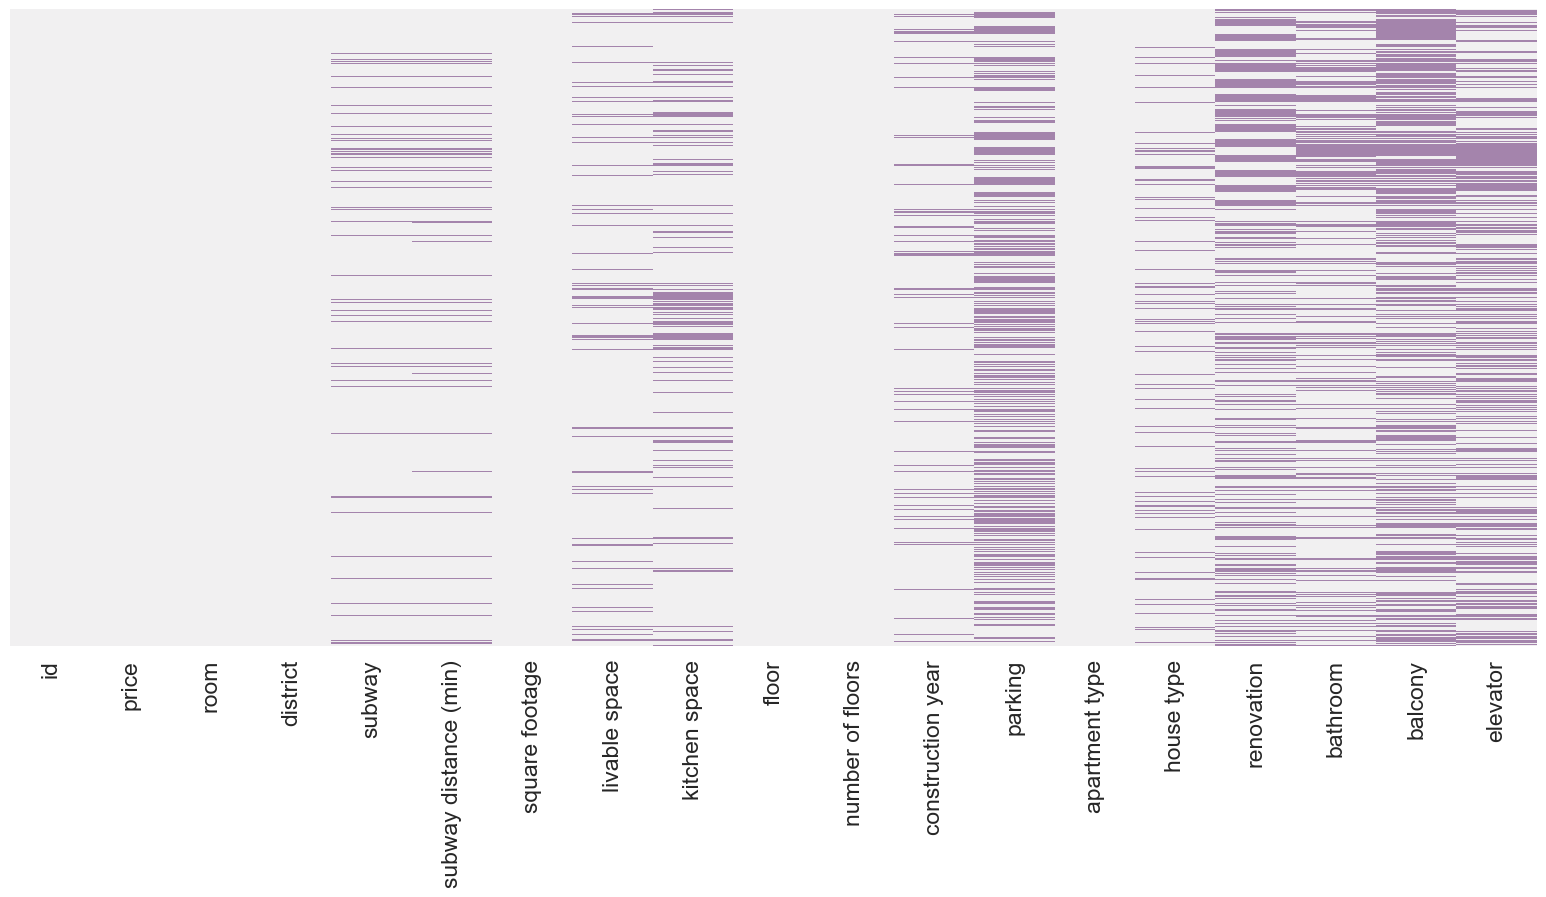

In [86]:
sns.set(font_scale=1.5, rc={'figure.figsize':(19.7,8.27)})
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap=sns.light_palette('xkcd:heather', as_cmap=True))

# Предобработка данных

## Очистка данных

In [87]:
df.head

<bound method NDFrame.head of              id       price  room          district             subway  \
0     284328061  17346553.0     1       Центральный  Площадь Восстания   
1     282959701   7500000.0     1  Василеостровский   Василеостровская   
2     294531289  23931708.0     1    Адмиралтейский         Балтийская   
3     284780590   8051980.0     1  Василеостровский         Спортивная   
4     262571736  48700000.0     2     Петроградский         Чкаловская   
...         ...         ...   ...               ...                ...   
1353  292580271  14800000.0     2        Выборгский             Лесная   
1354  293280176  14846500.0     2        Выборгский             Лесная   
1355  280115575  14933280.0     3       Калининский         Выборгская   
1356  291916086  14900000.0     2       Центральный       Чернышевская   
1357  293320129  14855008.0     1        Московский         Московская   

     subway distance (min)  square footage  livable space  kitchen space  \
0    

In [88]:
df['house type'] = df['house type'].str.replace(',','')

In [89]:
df['renovation'].fillna('Без', inplace=True)

In [90]:
df['parking'].fillna(0, inplace=True)
df['parking'] = np.where(df['parking'] != 0, 1, 0)

In [91]:
df.loc[:, 'subway distance (min)'].replace('откроется', None, inplace=True)
df['subway distance (min)'] = df['subway distance (min)'].astype(float)

In [92]:
df['bathroom'].fillna(1, inplace=True)
df['bathroom'] = df['bathroom'].astype(int)

In [93]:
df['elevator'].fillna(0, inplace=True)
df['elevator'] = df['elevator'].astype(int)

In [94]:
df['balcony'].fillna(0, inplace=True)
df['balcony'] = df['balcony'].astype(int)

In [95]:
df.dropna(inplace=True)
df.head

<bound method NDFrame.head of              id       price  room        district                    subway  \
2     294531289  23931708.0     1  Адмиралтейский                Балтийская   
4     262571736  48700000.0     2   Петроградский                Чкаловская   
5     292246812  36000000.0     3  Адмиралтейский  Технологический институт   
6     250578804  70726917.0     3   Петроградский                Чкаловская   
12    294696187   9278465.0     1     Фрунзенский                Волковская   
...         ...         ...   ...             ...                       ...   
1345  291677048  14569788.0     2      Московский         Московские ворота   
1351  285017876  14726920.0     1         Невский              Елизаровская   
1353  292580271  14800000.0     2      Выборгский                    Лесная   
1354  293280176  14846500.0     2      Выборгский                    Лесная   
1355  280115575  14933280.0     3     Калининский                Выборгская   

      subway distance

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 813 entries, 2 to 1355
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     813 non-null    int64  
 1   price                  813 non-null    float64
 2   room                   813 non-null    int64  
 3   district               813 non-null    object 
 4   subway                 813 non-null    object 
 5   subway distance (min)  813 non-null    float64
 6   square footage         813 non-null    float64
 7   livable space          813 non-null    float64
 8   kitchen space          813 non-null    float64
 9   floor                  813 non-null    int64  
 10  number of floors       813 non-null    int64  
 11  construction year      813 non-null    float64
 12  parking                813 non-null    int64  
 13  apartment type         813 non-null    object 
 14  house type             813 non-null    object 
 15  renovation

In [97]:
# поиск дубликатов
df.loc[df.duplicated()]

,id,price,room,district,subway,subway distance (min),square footage,livable space,kitchen space,floor,number of floors,construction year,parking,apartment type,house type,renovation,bathroom,balcony,elevator


In [98]:
df['construction year'] = df['construction year'].astype(int)

In [99]:
df.columns

Index(['id', 'price', 'room', 'district', 'subway', 'subway distance (min)',
       'square footage', 'livable space', 'kitchen space', 'floor',
       'number of floors', 'construction year', 'parking', 'apartment type',
       'house type', 'renovation', 'bathroom', 'balcony', 'elevator'],
      dtype='object')

In [100]:
df['price'] = df['price'].apply(lambda x: x / 1000000) # для корректного отображения цены в миллионах

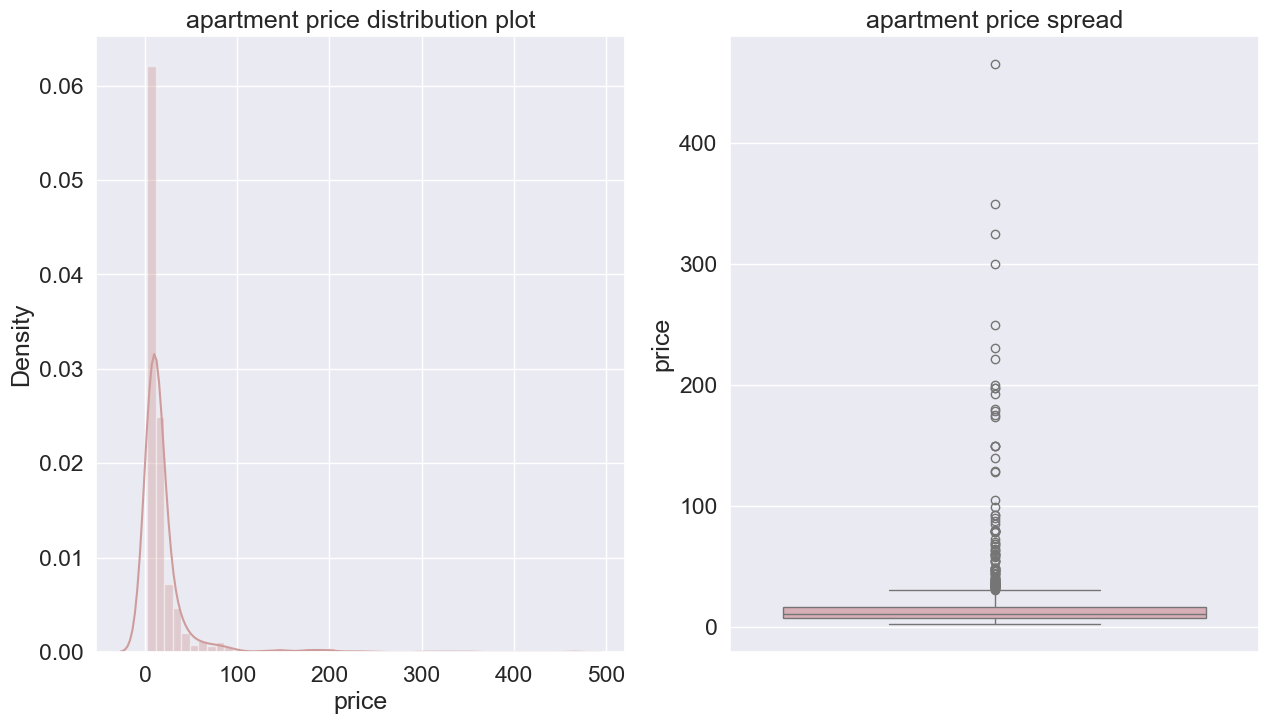

In [101]:
plt.figure(figsize=(15, 8))

plt.subplot(1,2,1)
plt.title('apartment price distribution plot')
sns.distplot(df['price'], color='#cf9c9c')

plt.subplot(1,2,2)
plt.title('apartment price spread')
sns.boxplot(y=df['price'], color='#dda9b2')

plt.show()

In [102]:
# plt.figure(figsize=(18, 6))
# chart2 = sns.boxplot(x = df["district"], y = df["price"], palette="blend:#dda9b2,#aa83a6")
# chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90)
# plt.xlabel("district", size=20)
# plt.ylabel("price", size=20)
# plt.show();

## Удаление выбросов

In [103]:
def remove_outliers(column_name, df_in):
    print(f"length before removing {column_name} outlier:",  len(df_in))
    df_in[f'{column_name}_zscore'] = np.abs(stats.zscore(df_in[f'{column_name}']))
    df_clean = df_in[df_in[f'{column_name}_zscore'] < 3]
    print(f"length after removing {column_name} outlier:",  len(df_clean))
    return df_clean

In [104]:
df = remove_outliers('price', df)

length before removing price outlier: 813
length after removing price outlier: 794


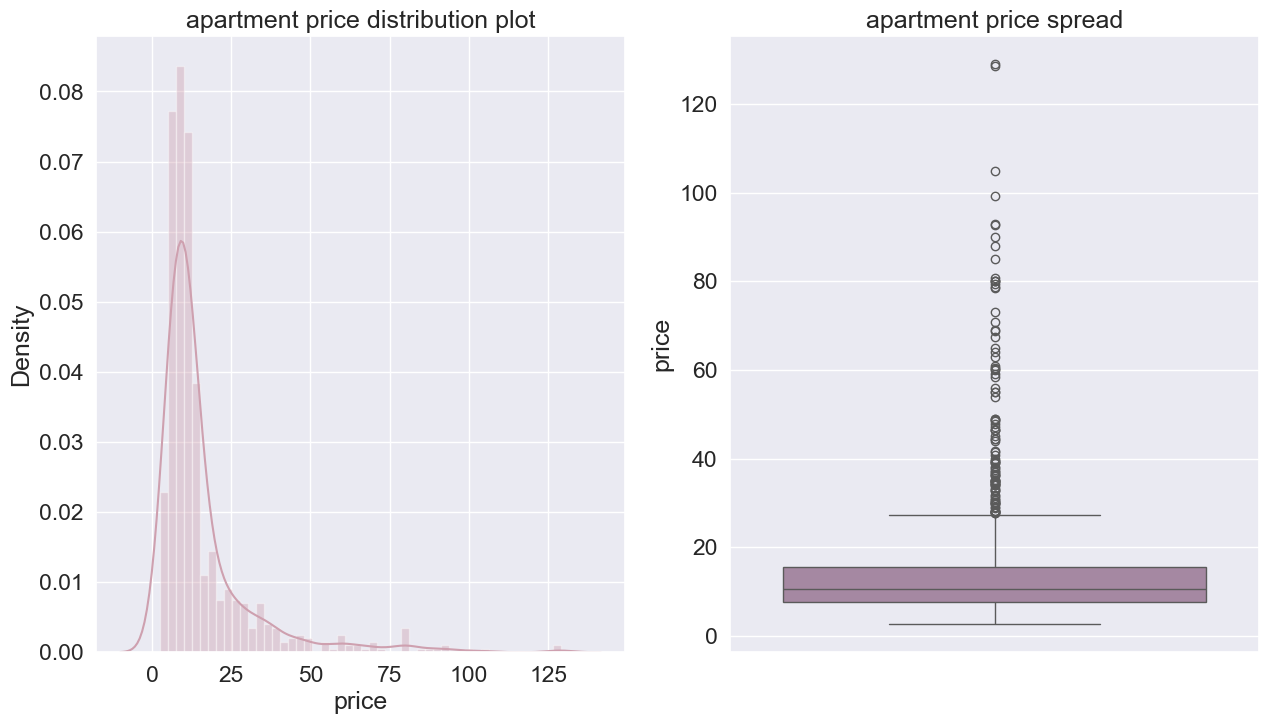

In [105]:
plt.figure(figsize=(15, 8))

plt.subplot(1,2,1)
plt.title('apartment price distribution plot')
sns.distplot(df['price'], color='#cea0af')

plt.subplot(1,2,2)
plt.title('apartment price spread')
sns.boxplot(y=df['price'], color='#aa83a6')

plt.show()

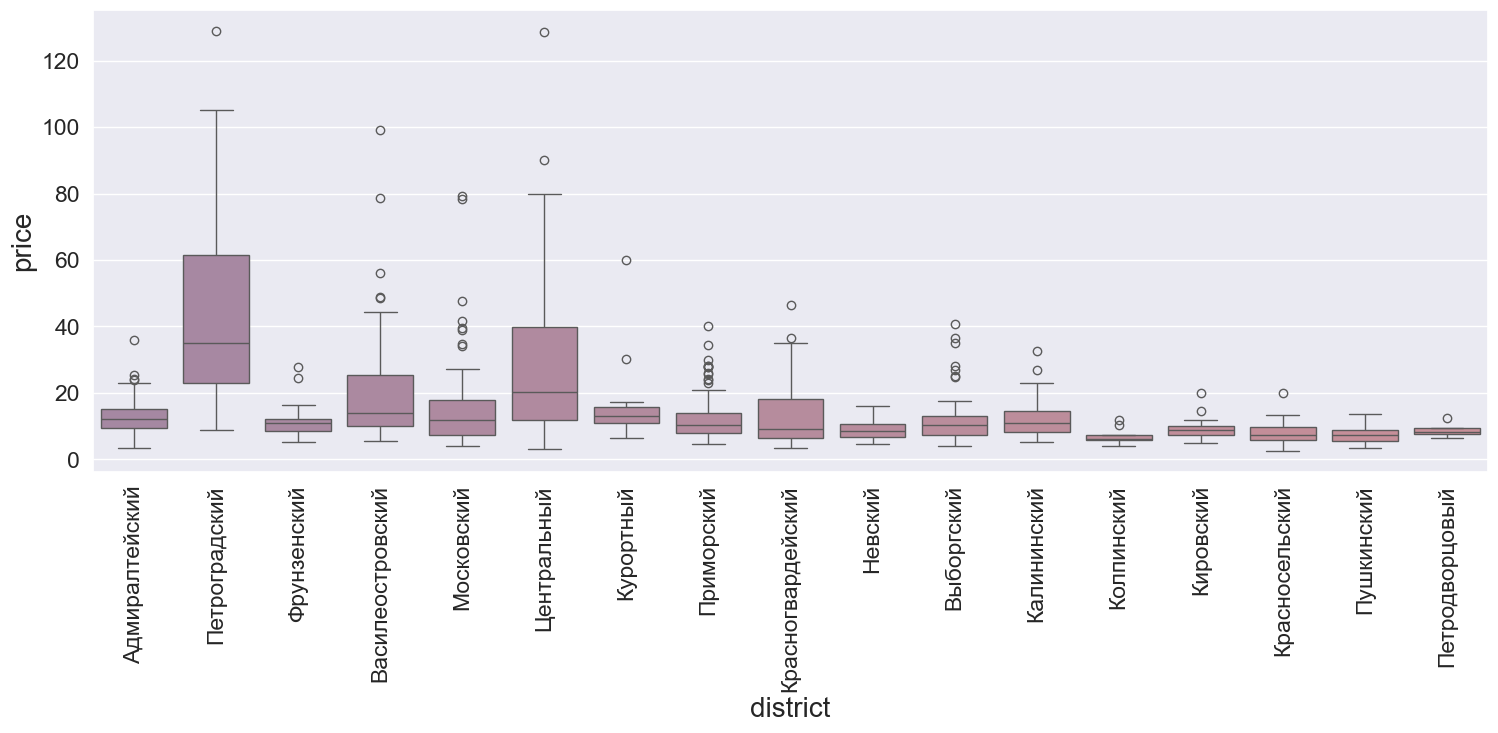

In [106]:
plt.figure(figsize=(18, 6))
chart2 = sns.boxplot(x = df["district"], y = df["price"], palette="blend:#aa83a6,#d08692")
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90)
plt.xlabel("district", size=20)
plt.ylabel("price", size=20)
plt.show();

In [107]:
df['price'].describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1])

count    794.000000
mean      15.783699
std       15.926508
min        2.600000
25%        7.600597
50%       10.600000
75%       15.471754
85%       24.500761
90%       32.799660
100%     129.000000
max      129.000000
Name: price, dtype: float64

In [108]:
df.head

<bound method NDFrame.head of              id      price  room        district                    subway  \
2     294531289  23.931708     1  Адмиралтейский                Балтийская   
4     262571736  48.700000     2   Петроградский                Чкаловская   
5     292246812  36.000000     3  Адмиралтейский  Технологический институт   
6     250578804  70.726917     3   Петроградский                Чкаловская   
12    294696187   9.278465     1     Фрунзенский                Волковская   
...         ...        ...   ...             ...                       ...   
1345  291677048  14.569788     2      Московский         Московские ворота   
1351  285017876  14.726920     1         Невский              Елизаровская   
1353  292580271  14.800000     2      Выборгский                    Лесная   
1354  293280176  14.846500     2      Выборгский                    Лесная   
1355  280115575  14.933280     3     Калининский                Выборгская   

      subway distance (min)  squa

## Исследование категориальных признаков

### Район

[Text(0.5, 1.0, 'district histogram')]

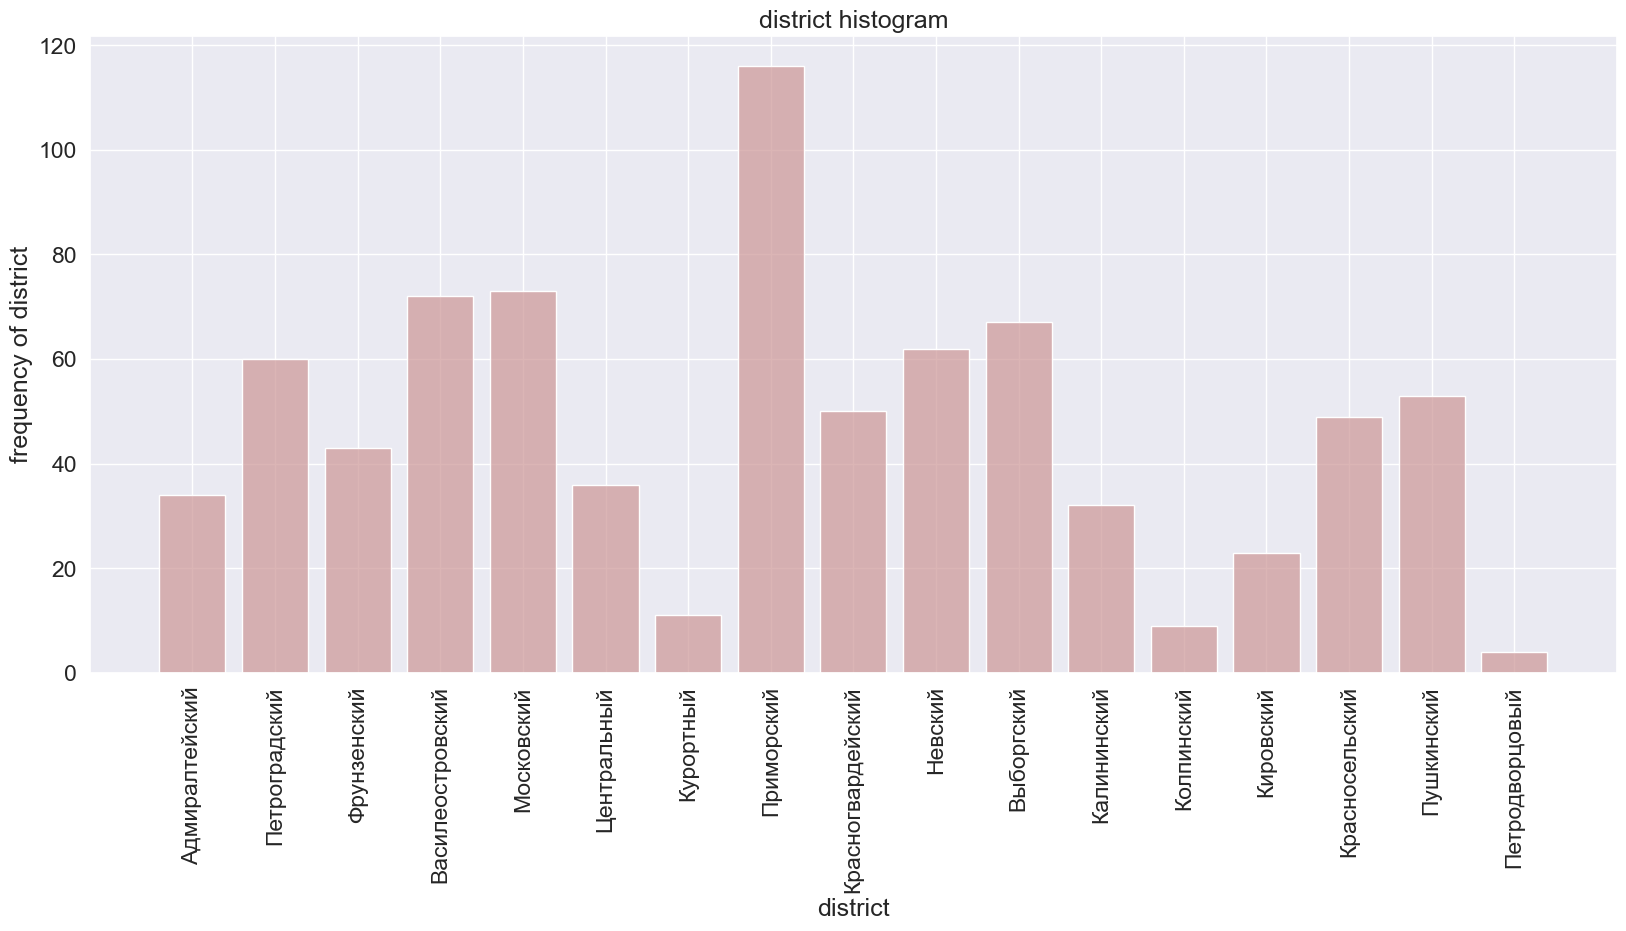

In [109]:
ax = sns.histplot(df['district'], shrink=0.8, color="#cf9c9c")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(xlabel='district', ylabel='frequency of district')
ax.set(title='district histogram')

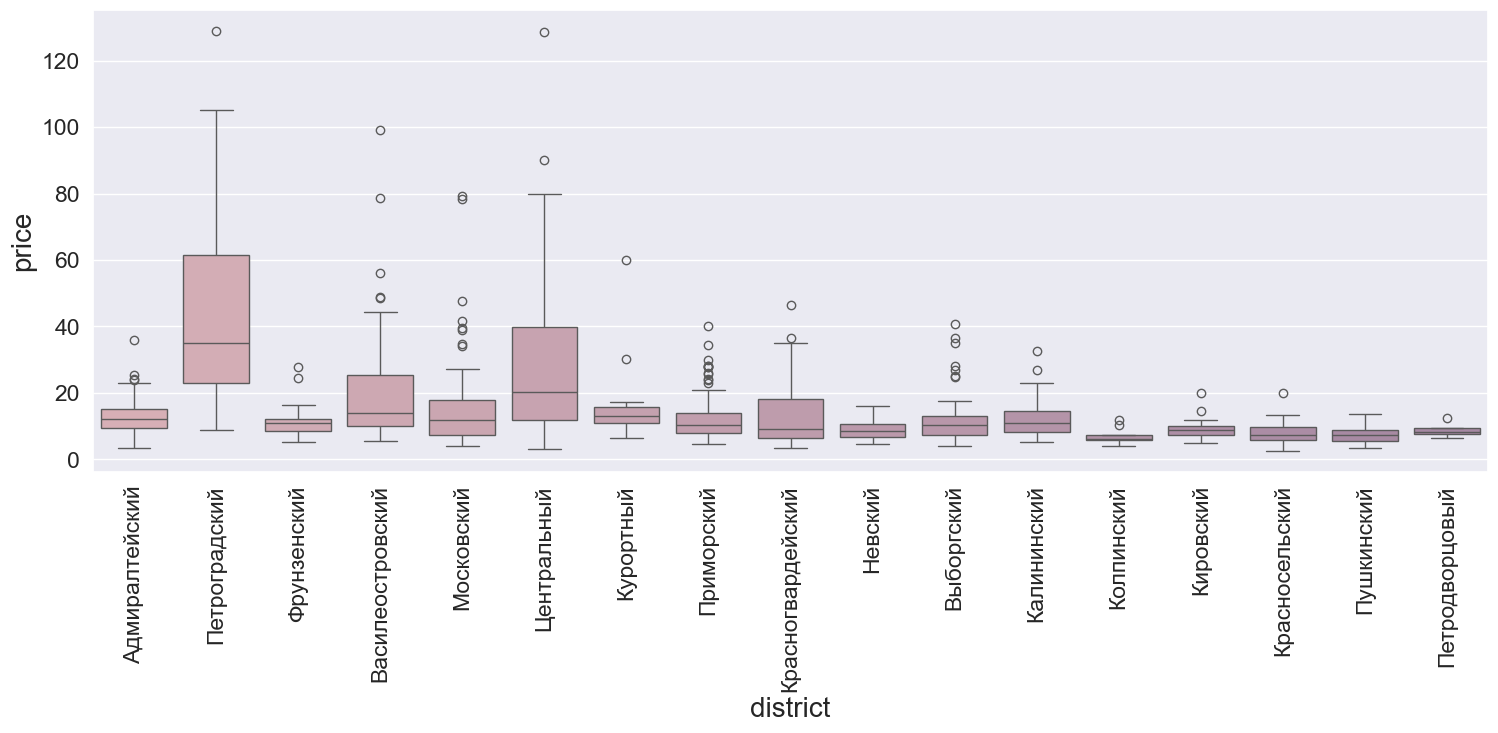

In [110]:
plt.figure(figsize=(18, 6))
chart2 = sns.boxplot(x = df["district"], y = df["price"], palette="blend:#dda9b2,#aa83a6")
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90)
plt.xlabel("district", size=20)
plt.ylabel("price", size=20)
plt.show();

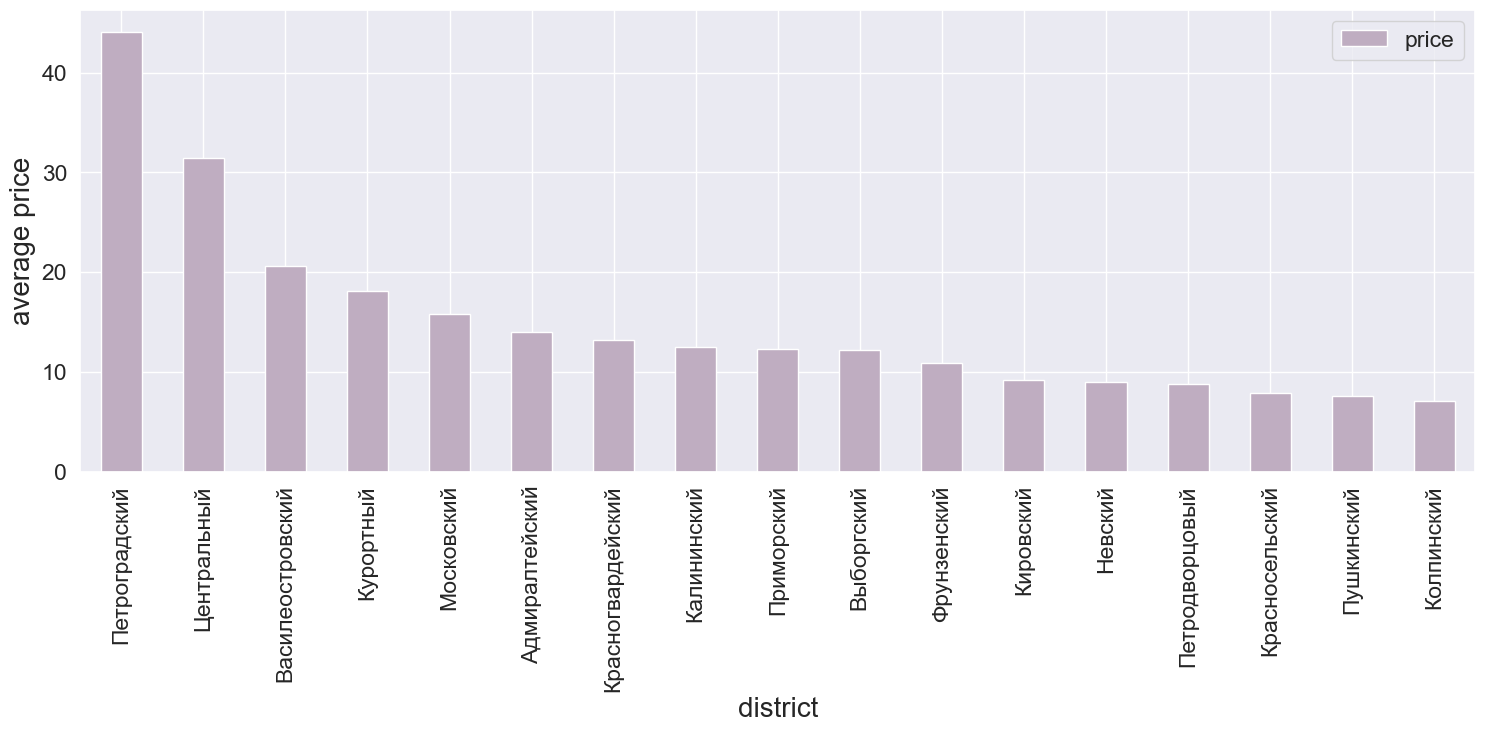

In [111]:
copy = pd.DataFrame(df.groupby(['district'])['price'].mean().sort_values(ascending = False))
copy.plot.bar(figsize=(18,6), color="#bfadc1")
plt.xlabel("district", size=20)
plt.ylabel("average price", size=20)
plt.show()

### Станция метро

[Text(0.5, 1.0, 'subway histogram')]

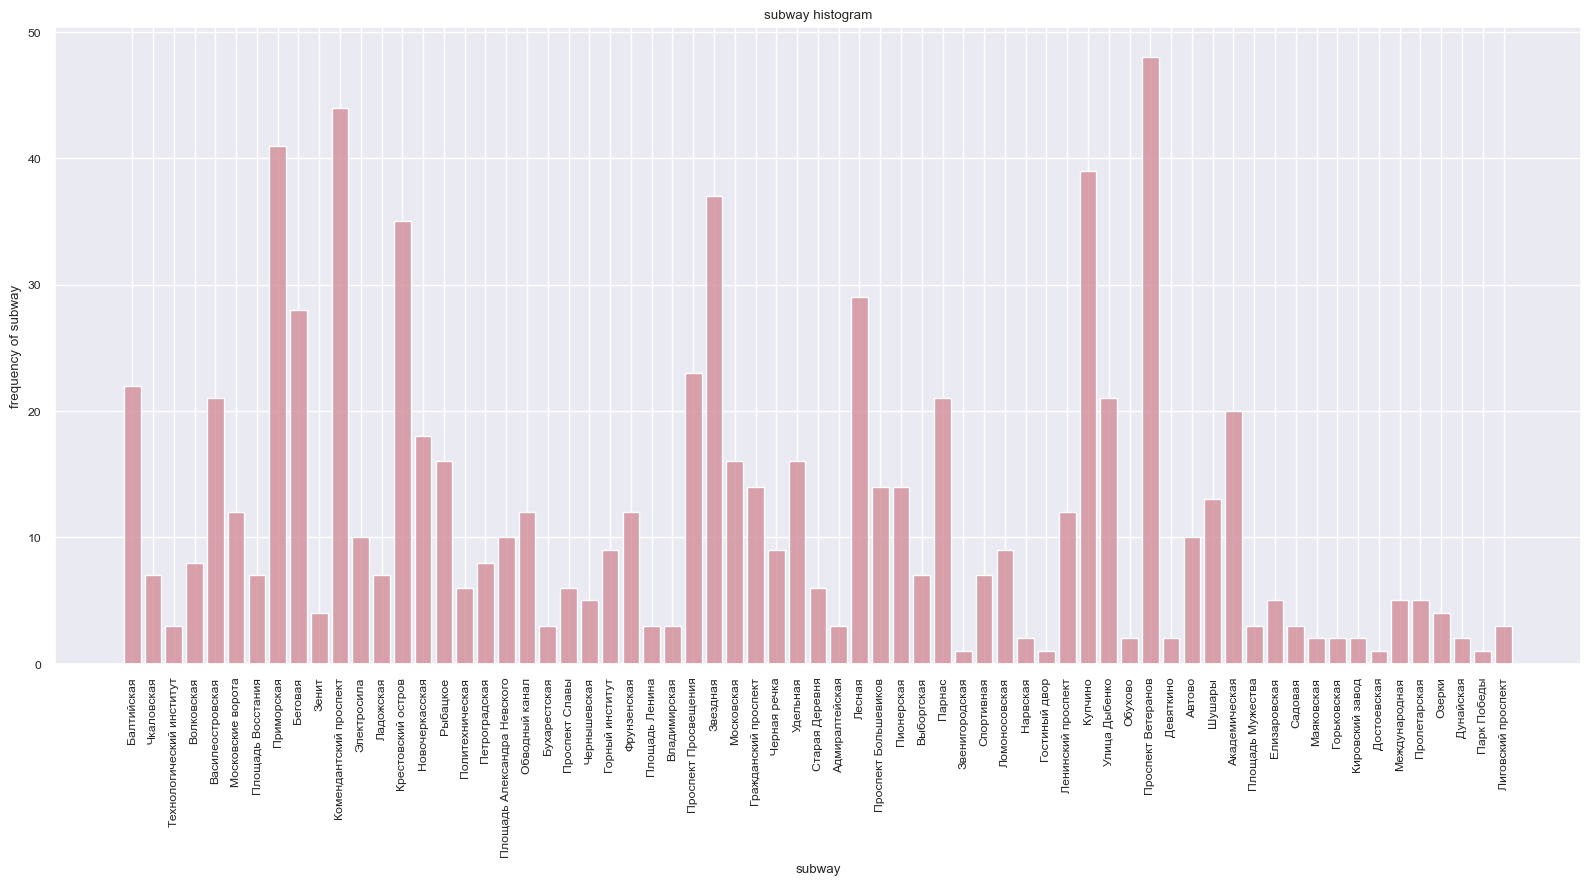

In [112]:
sns.set(font_scale=0.8)
ax = sns.histplot(df['subway'], shrink=0.8, color="#d08692")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(xlabel='subway', ylabel='frequency of subway')
ax.set(title='subway histogram')

In [113]:
sns.set(font_scale=1.2)

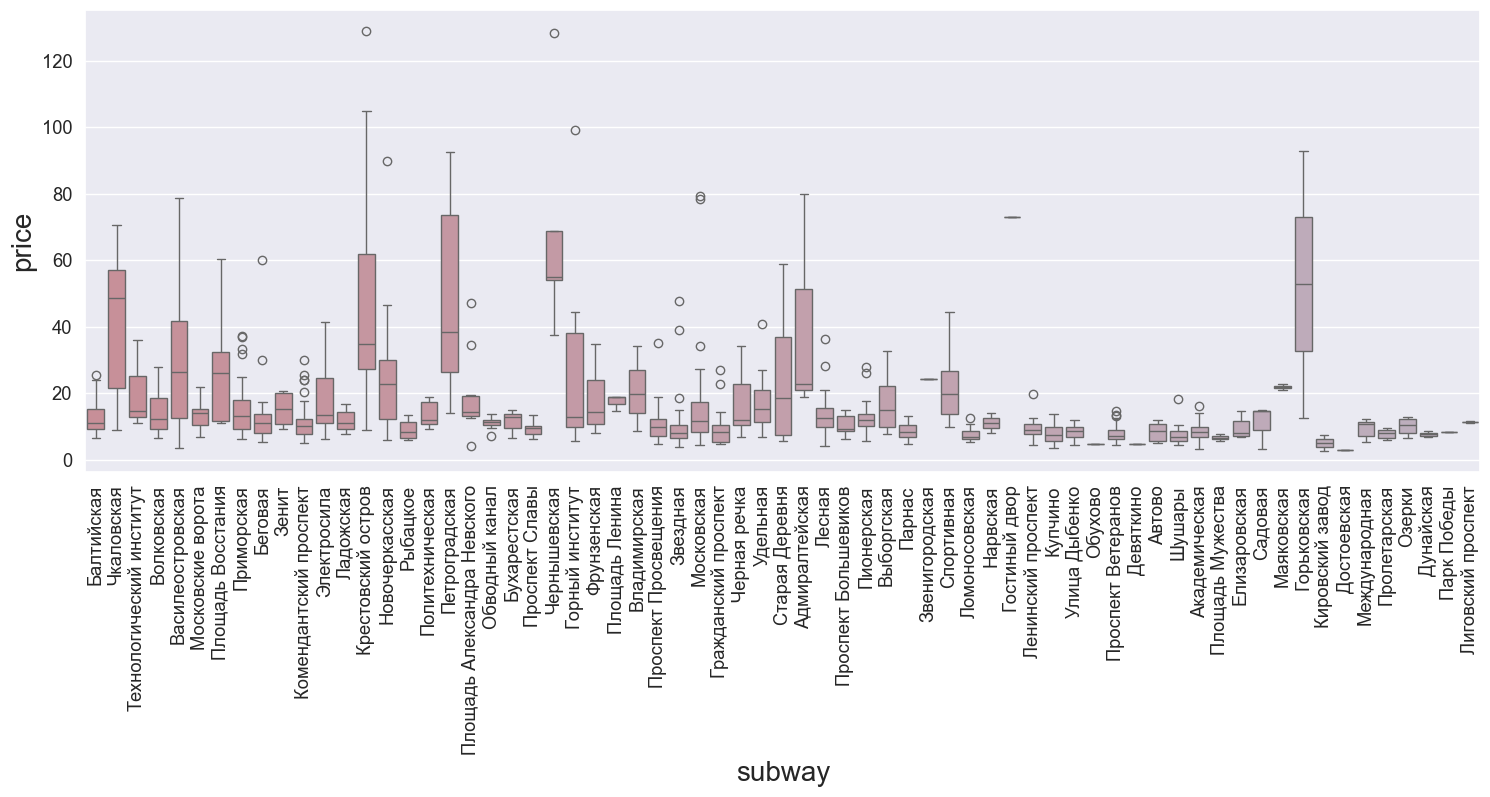

In [114]:
plt.figure(figsize=(18, 6))
chart2 = sns.boxplot(x = df["subway"], y = df["price"], palette="blend:#d08692,#bfadc1")
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90)
plt.xlabel("subway", size=20)
plt.ylabel("price", size=20)
plt.show();

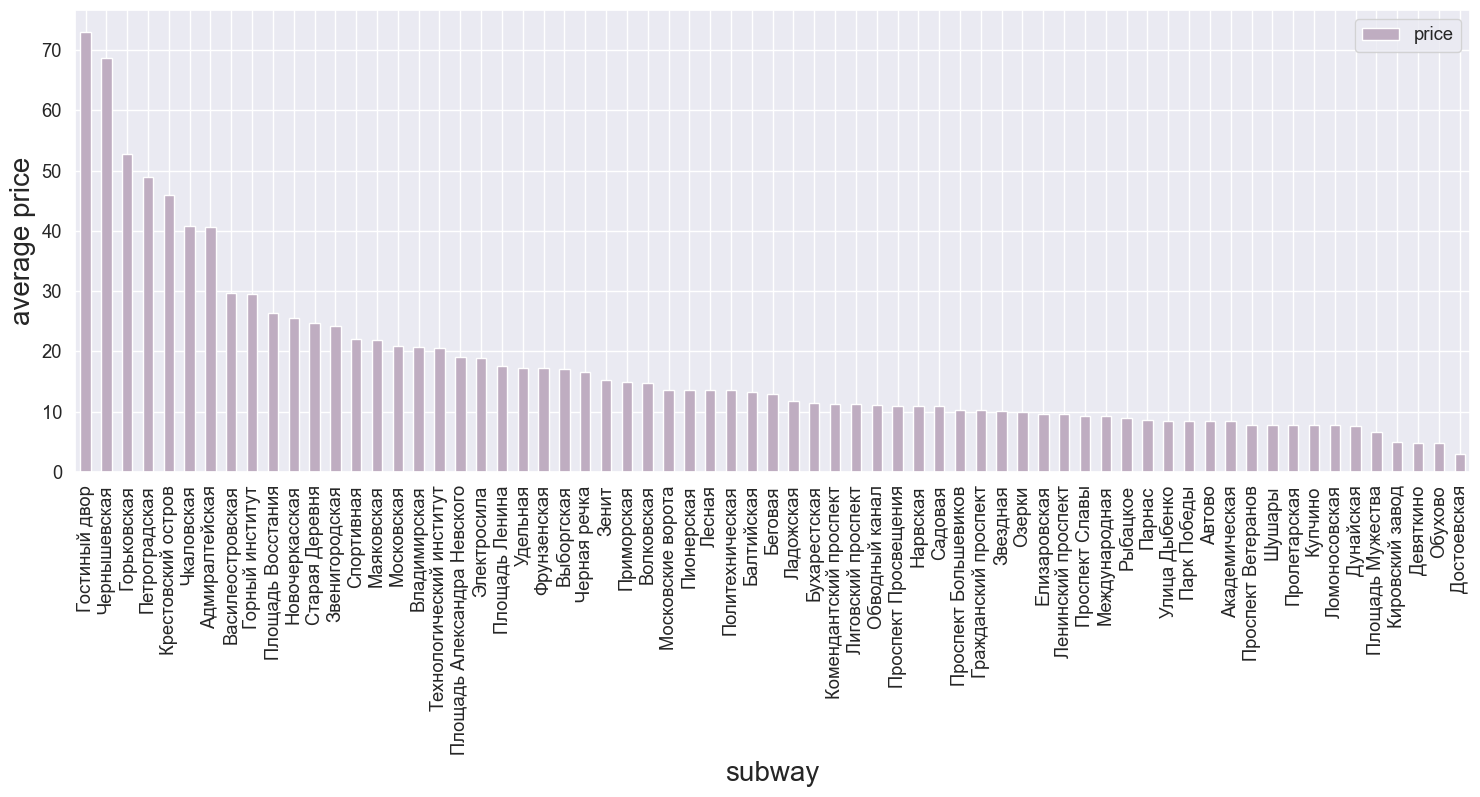

In [115]:
copy = pd.DataFrame(df.groupby(['subway'])['price'].mean().sort_values(ascending = False))
copy.plot.bar(figsize=(18,6), color="#bfadc1")
plt.xlabel("subway", size=20)
plt.ylabel("average price", size=20)
plt.show()

### Тип жилья

In [116]:
sns.set(font_scale=2)
sns.set(rc={'figure.figsize':(9, 5)})

[Text(0.5, 1.0, 'apartment type histogram')]

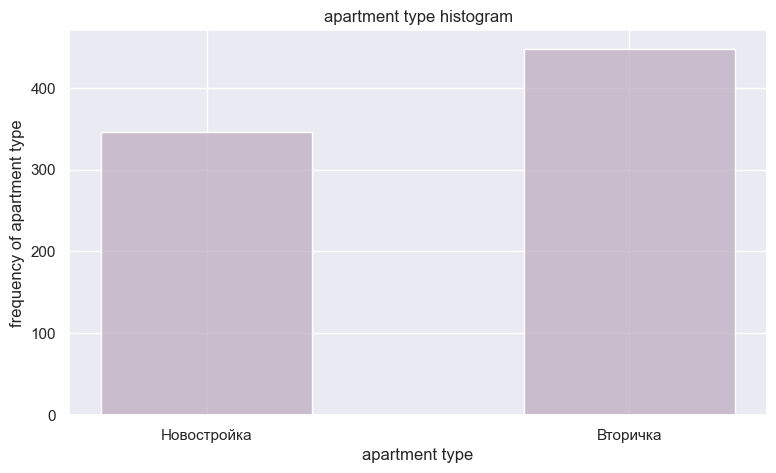

In [117]:
ax = sns.histplot(df['apartment type'], shrink=0.5, color="#bfadc1")
ax.set(xlabel='apartment type', ylabel='frequency of apartment type')
ax.set(title='apartment type histogram')

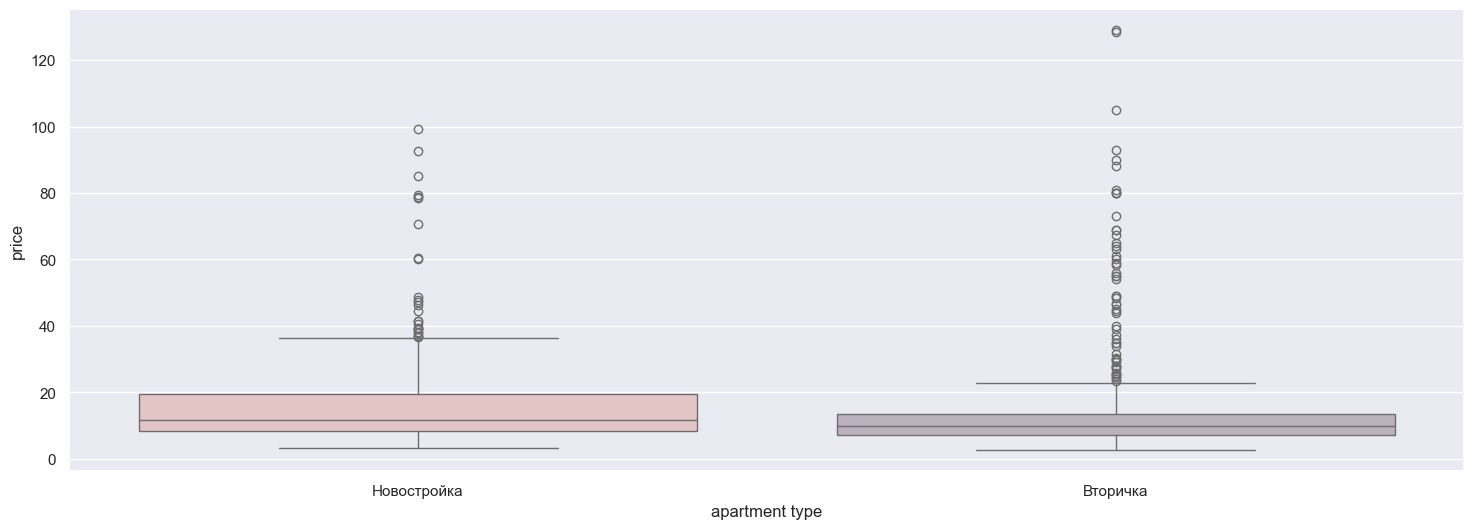

In [118]:
plt.figure(figsize=(18, 6))
chart2 = sns.boxplot(x = df["apartment type"], y = df["price"], palette="blend:#e8c0c0,#bfadc1")
plt.xlabel("apartment type")
plt.ylabel("price")
plt.show();

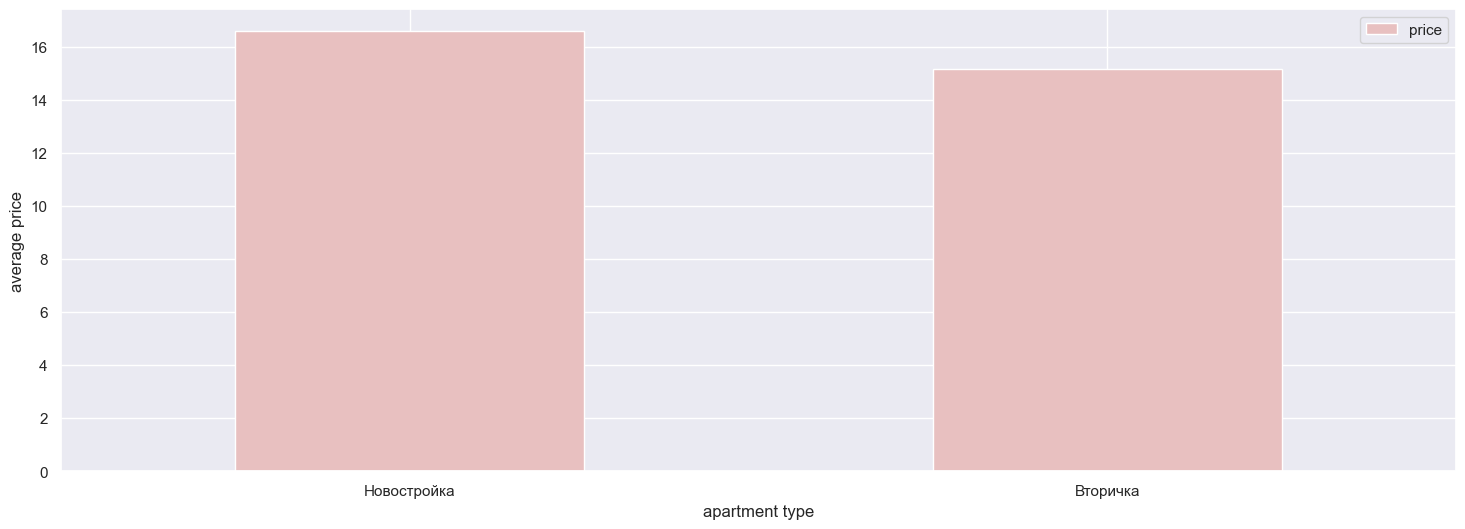

In [119]:
copy = pd.DataFrame(df.groupby(['apartment type'])['price'].mean().sort_values(ascending = False))
copy.plot.bar(figsize=(18,6), color="#e8c0c0", rot=0)
plt.xlabel("apartment type")
plt.ylabel("average price")
plt.show()

### Тип дома

[Text(0.5, 1.0, 'house type histogram')]

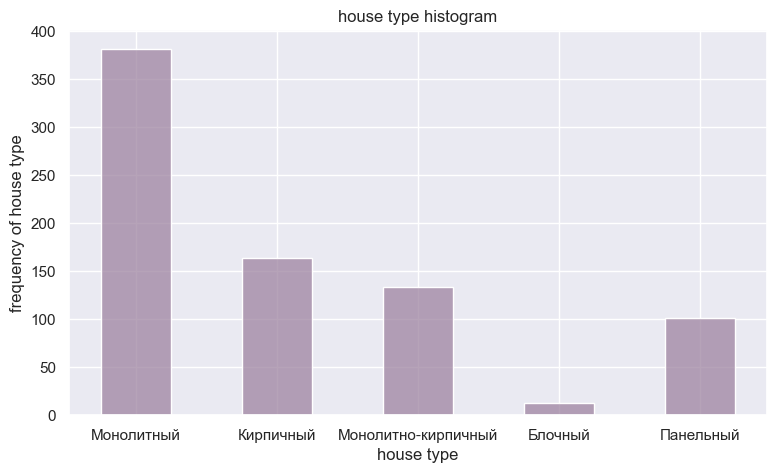

In [120]:
ax = sns.histplot(df['house type'], shrink=0.5, color="#9e84a1")
ax.set(xlabel='house type', ylabel='frequency of house type')
ax.set(title='house type histogram')

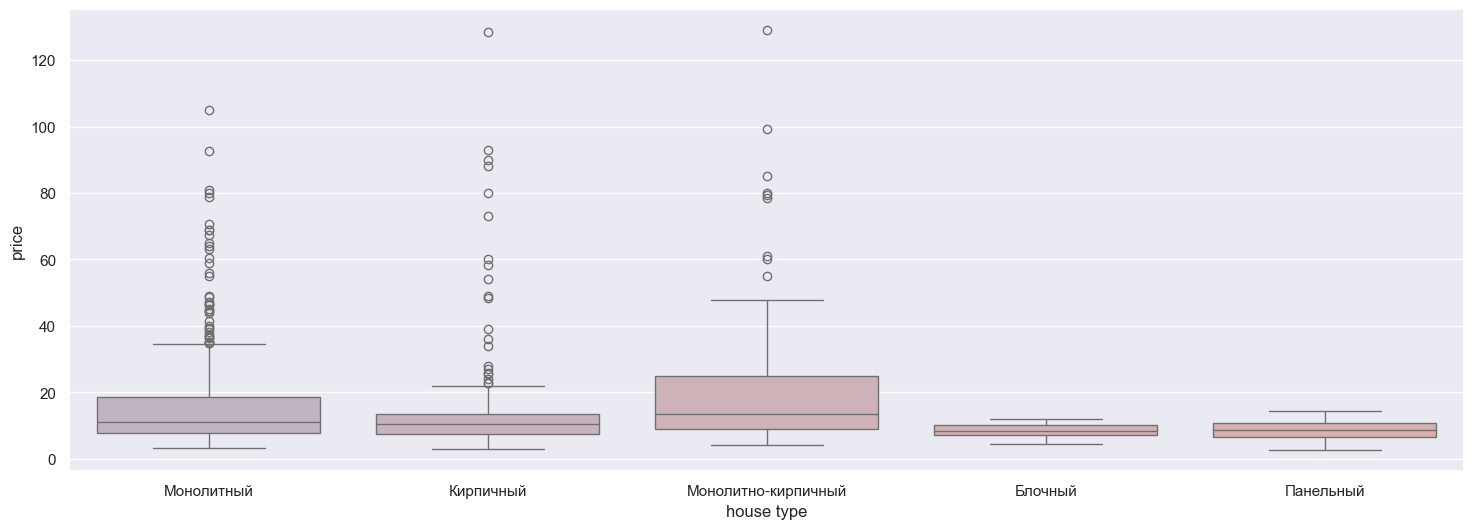

In [121]:
plt.figure(figsize=(18, 6))
chart2 = sns.boxplot(x = df["house type"], y = df["price"], palette="blend:#c3b2c4,#dfa9a8")
plt.xlabel("house type")
plt.ylabel("price")
plt.show();

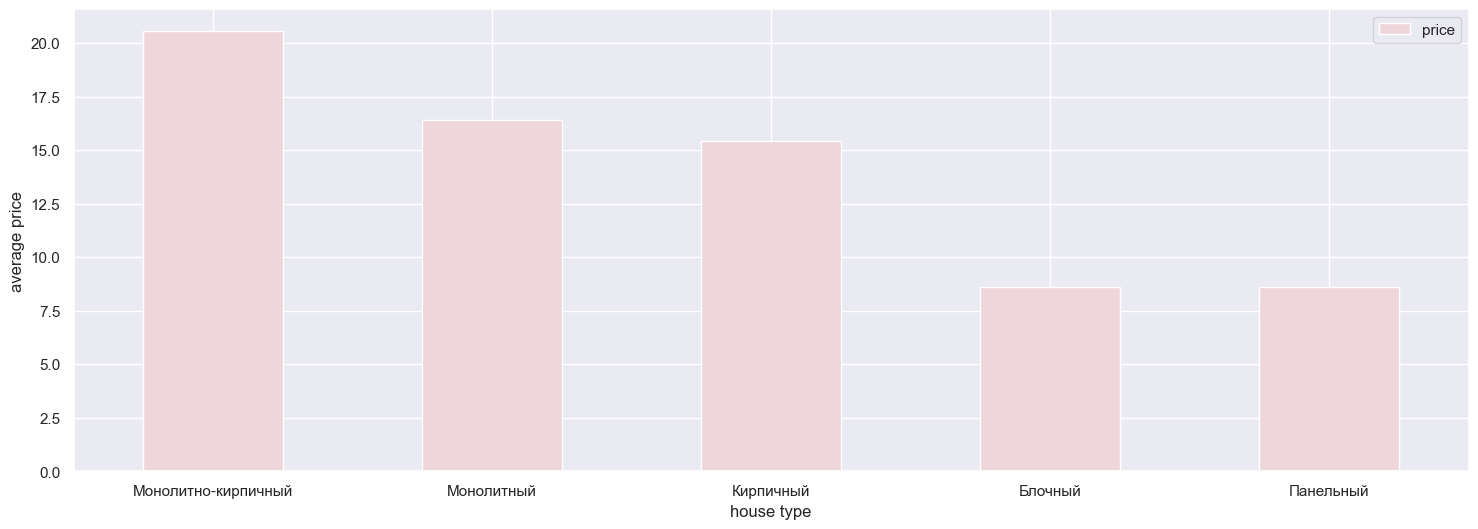

In [122]:
copy = pd.DataFrame(df.groupby(['house type'])['price'].mean().sort_values(ascending = False))
copy.plot.bar(figsize=(18,6), color="#efd6da", rot=0)
plt.xlabel("house type")
plt.ylabel("average price")
plt.show()

### Ремонт

[Text(0.5, 1.0, 'renovation histogram')]

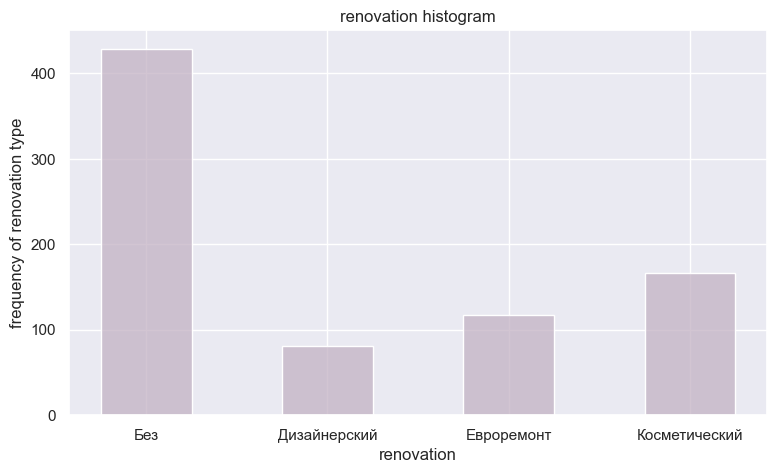

In [123]:
ax = sns.histplot(df['renovation'], shrink=0.5, color="#c3b2c4")
ax.set(xlabel='renovation', ylabel='frequency of renovation type')
ax.set(title='renovation histogram')

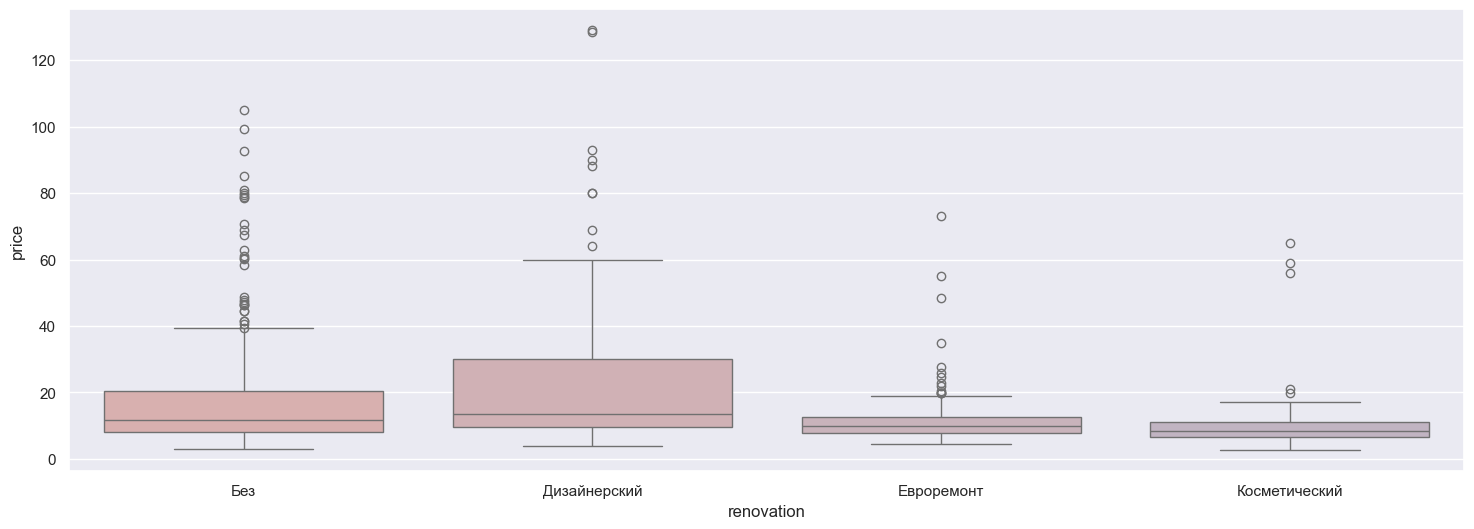

In [124]:
plt.figure(figsize=(18, 6))
chart2 = sns.boxplot(x = df["renovation"], y = df["price"], palette="blend:#dfa9a8,#c3b2c4")
plt.xlabel("renovation")
plt.ylabel("price")
plt.show();

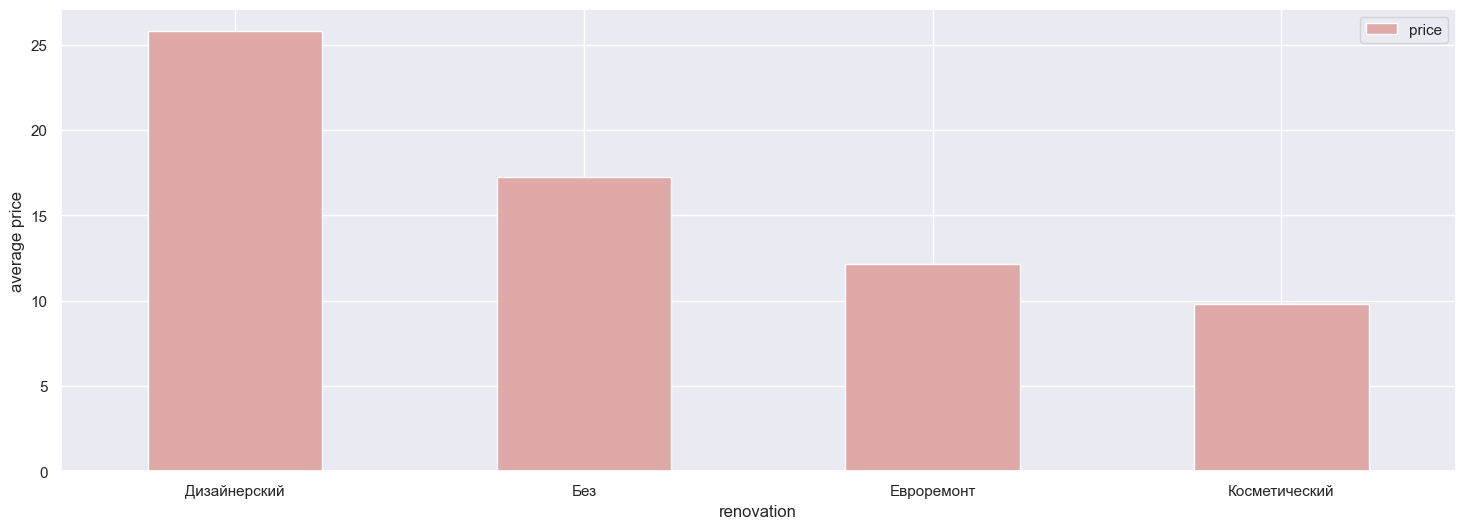

In [125]:
copy = pd.DataFrame(df.groupby(['renovation'])['price'].mean().sort_values(ascending = False))
copy.plot.bar(figsize=(18,6), color="#dfa9a8", rot=0)
plt.xlabel("renovation")
plt.ylabel("average price")
plt.show()

## Исследование численных признаков

In [126]:
def scatter(column: str, n: int, color: str) -> None:
    plt.subplot(5, 2, n)
    plt.scatter(df[column], df['price'], color=color)
    plt.title(column+' vs price')
    plt.ylabel('price')
    plt.xlabel(column)

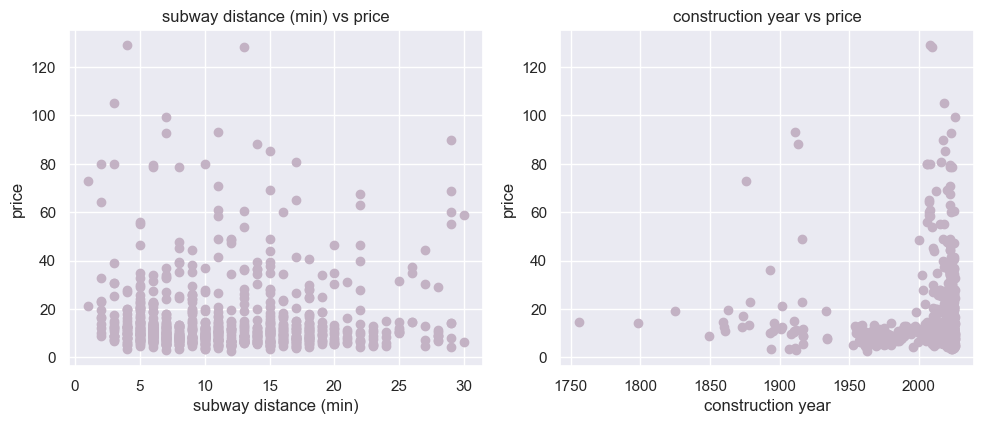

In [127]:
plt.figure(figsize=(10,20))

scatter('subway distance (min)', 1, "#c3b2c4")
scatter('construction year', 2, "#c3b2c4")

plt.tight_layout()

Полученные точечные диаграммы наглядно демонстрируют, что близость к метро (на удивление) не оказывает существенного влияния на таргет, ровно так же, как и год постройки, т.к. между данными величинами и ценой не наблюдается значительной корреляции от слова совсем.

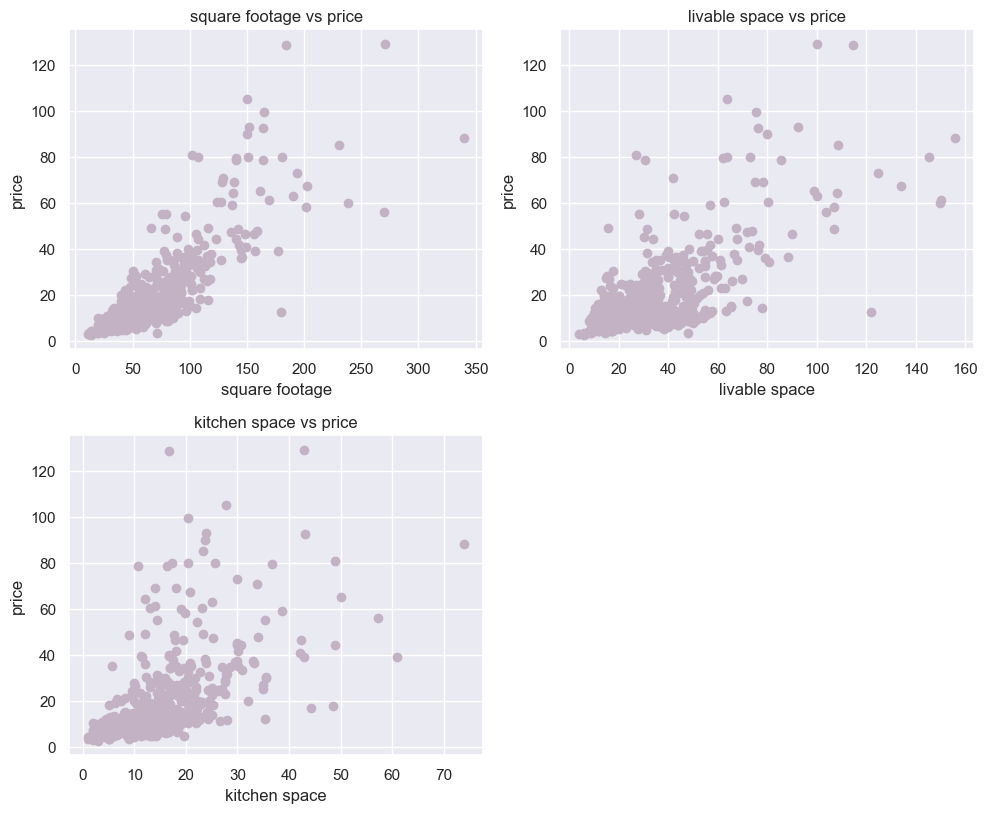

In [128]:
plt.figure(figsize=(10,20))

scatter('square footage', 1, "#c3b2c4")
scatter('livable space', 2, "#c3b2c4")
scatter('kitchen space', 3, "#c3b2c4")

plt.tight_layout()

Между общей площадь квартиры и ценой наблюдается значительная положительная корреляция, что свидетельствует о наличии приближённой линейной зависимости. Такая же ситуация и для жилой площади помещения и цены, и площади кухни и цены.

Впоследствии будет необходимо проверить данные признаки на наличие скрытой линейной зависимости, так как в случае её наличия у вектора весов $w$ появятся очень большие по модулю компоненты (при этом сам вектор весов будет вычислен с большой погрешностью из-за деления на маленькое число). Кроме этого, все ошибки и весь шум, которые имелись в матрице $X$, при вычислении $y \sim Xw$ будут умножаться на эти большие и неточные числа и очень быстро возрастать, что приведёт к проблемам, от которых не спасёт никакое сингулярное разложение.

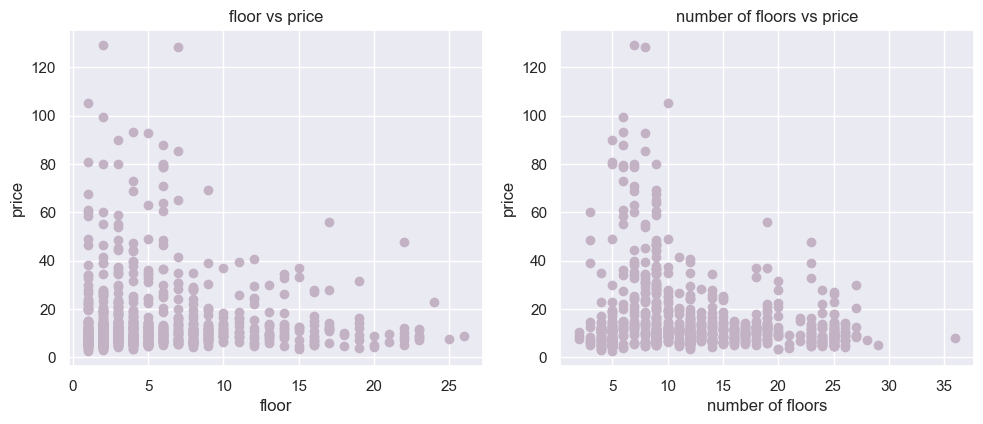

In [129]:
plt.figure(figsize=(10,20))

scatter('floor', 1, "#c3b2c4")
scatter('number of floors', 2, "#c3b2c4")

plt.tight_layout()

Приведённые графики показывают, что между ценой квартиры и номером этажа, на котором она расположена, а также между ценой квартиры и количеством этажей в доме, отсутствует значительная корреляция. Таким образом, данные фичи можно не добавлять в датасет, на котором будет произведено обучение модели, потому что они оказывают очень малое влияние на формирование итоговой цены.

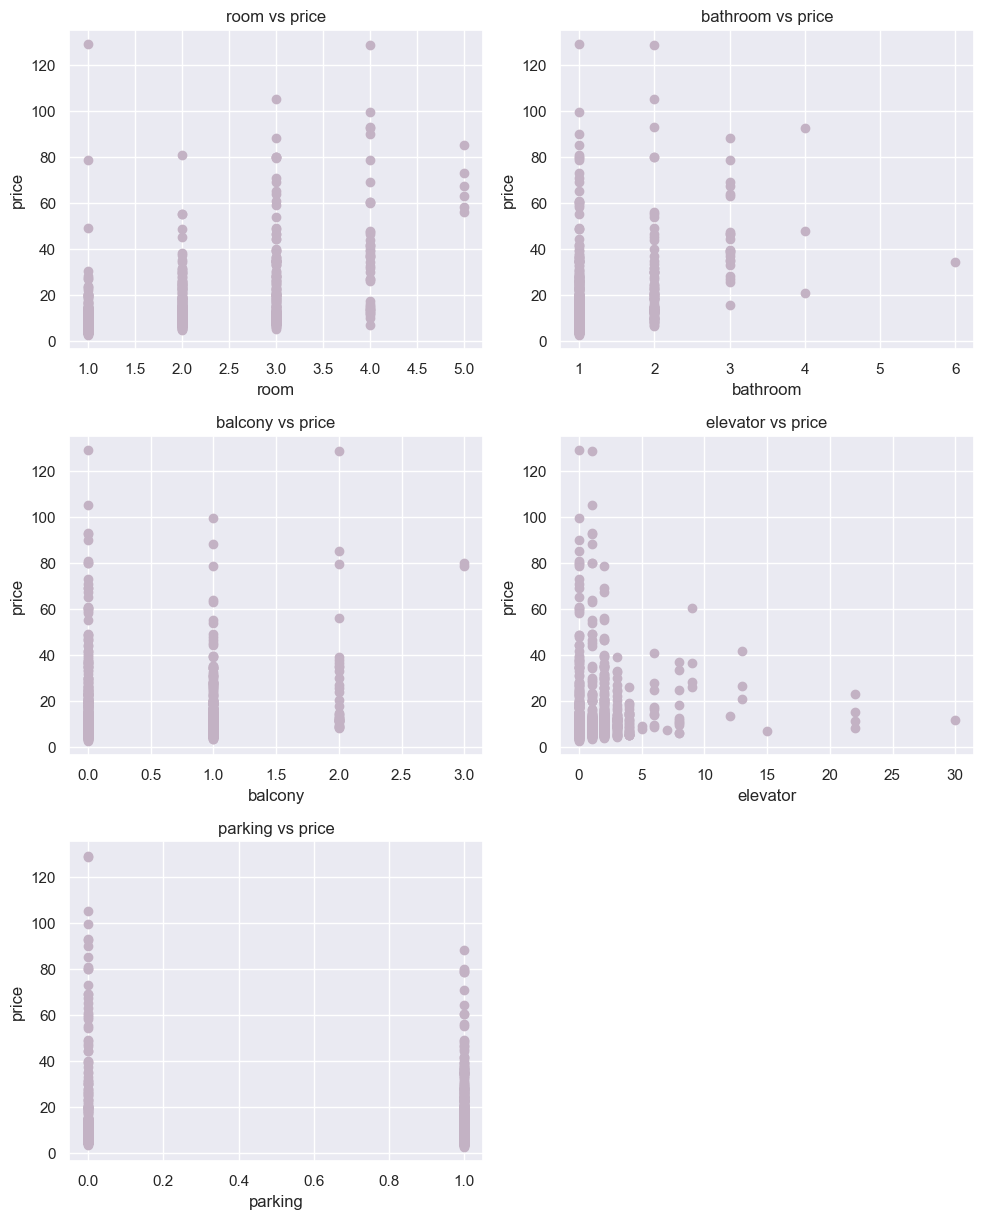

In [130]:
plt.figure(figsize=(10,20))

scatter('room', 1, "#c3b2c4")
scatter('bathroom', 2, "#c3b2c4")
scatter('balcony', 3, "#c3b2c4")
scatter('elevator', 4, "#c3b2c4")
scatter('parking', 5, "#c3b2c4")

plt.tight_layout()

Из-за малого диапазона значений по диаграмме рассеивания довольно сложно определить наличие или отсутствие линейной зависимости между признаками и таргетом.

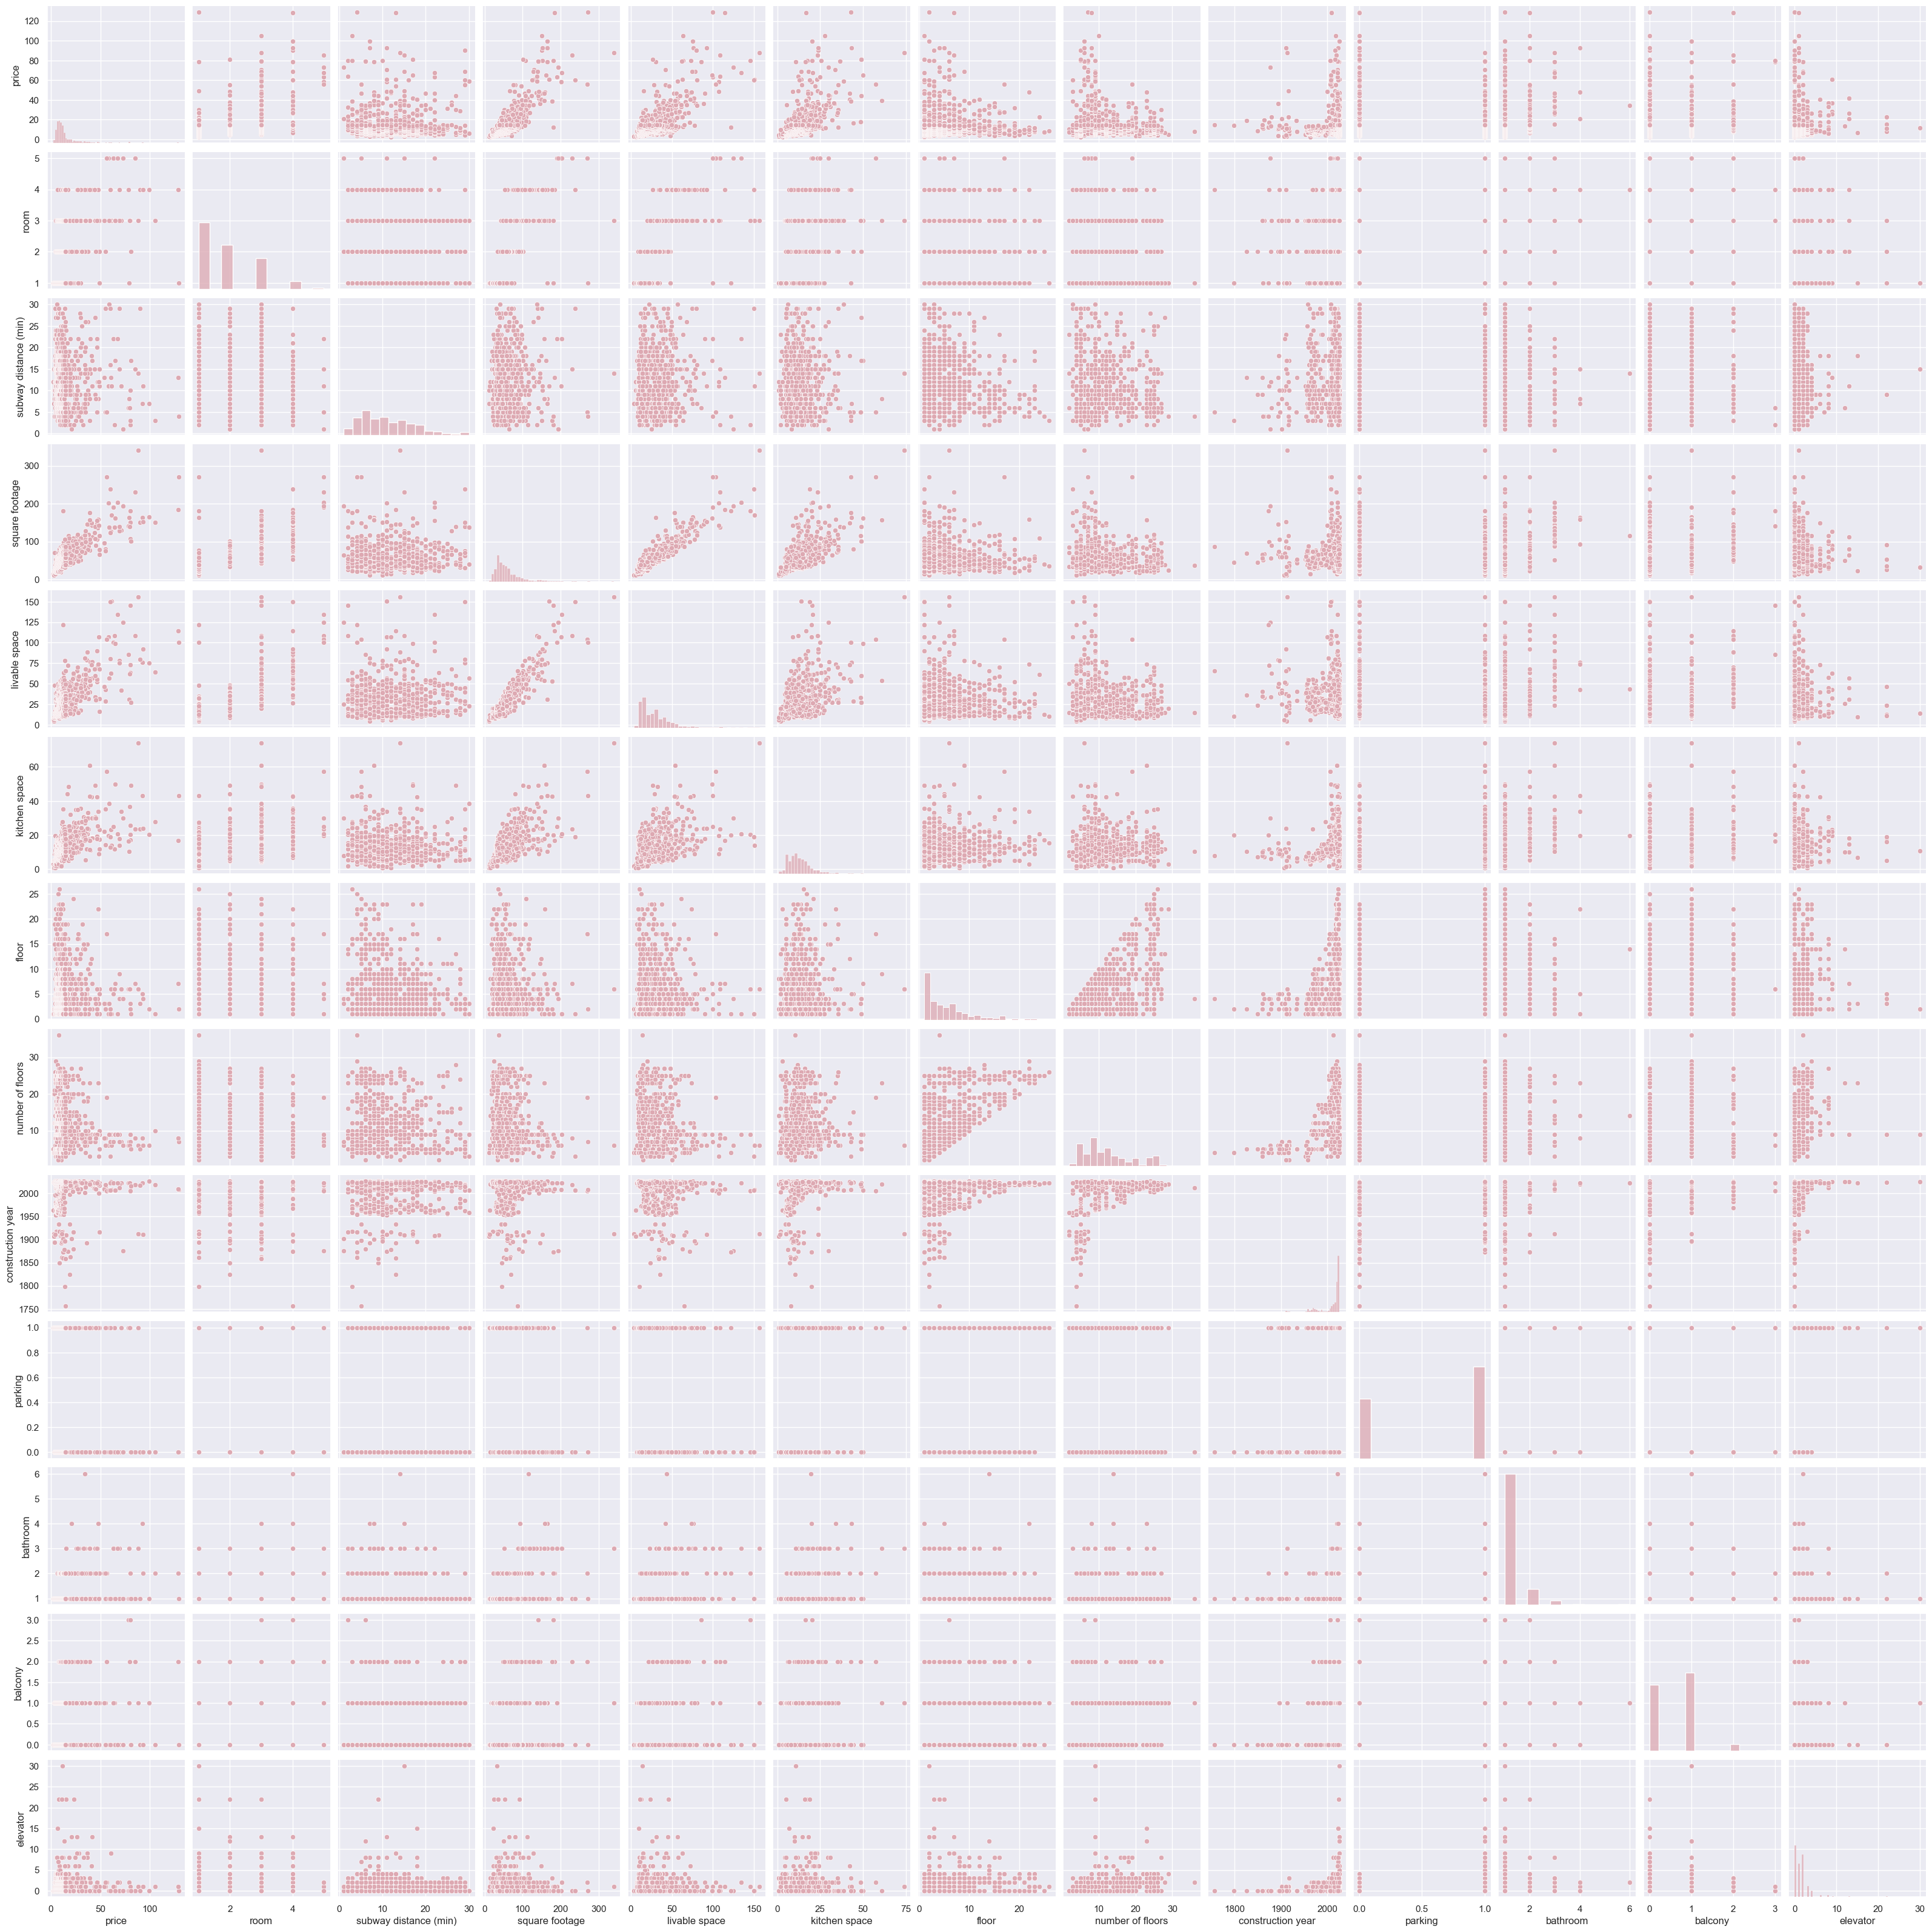

In [131]:
sns.set_palette("blend:#dda9b2,#aa83a6")
df.drop(columns=['id', 'price_zscore'], inplace=True)
sns.pairplot(df)
plt.show()

Между такими численным признаками, как общая площадь квартиры, жилая площадь и площадь кухни наблюдается скрытая линейная зависимость.

Если между признаками есть приближённая линейная зависимость, коэффициенты в линейной модели могут совершенно потерять физический смысл.
Малые погрешности признаков сильно возрастают при предсказании ответа, а в градиентном спуске накапливается погрешность из-за операций со слишком большими числами. Мультиколлинеарность делает модель не только неточной, но и принципиально не интерпретируемой.

Таким образом, чтобы в дальнейшем избежать Data Leak'а и переобучения, избежать вычислительных трудностей, необходимо оставить только один из перечисленных признаков, пусть это будет общая площадь помещения (square footage).

In [132]:
df.columns

Index(['price', 'room', 'district', 'subway', 'subway distance (min)',
       'square footage', 'livable space', 'kitchen space', 'floor',
       'number of floors', 'construction year', 'parking', 'apartment type',
       'house type', 'renovation', 'bathroom', 'balcony', 'elevator'],
      dtype='object')

In [133]:
columns = ['price', 'district', 'subway', 'room', 'square footage', 'floor', 'parking', 'apartment type', 'house type', 'renovation', 'bathroom', 'balcony', 'elevator']
df_lr = df[columns]

## Бинаризация

Чтобы решить проблему создания $N$ дополнительных бинарных фич, где $N$ - мощность множетсва категорий этого атрибута, возникающую при использовании one-hot encoding'а, для маппинга категориальных переменных в числовые значения воспользуемся binary encoding'ом: он работает, как label-encoding, только в двоичном представлении номера категории.
За счет такого подхода мы создадим не $N$, а $\log_2(N)$ дополнительных бинарных фич.

In [134]:
encoder = BinaryEncoder(cols=['district'], drop_invariant=True)
df_lr = encoder.fit_transform(df_lr)

In [135]:
encoder = BinaryEncoder(cols=['subway'], drop_invariant=True)
df_lr = encoder.fit_transform(df_lr)

In [136]:
encoder = BinaryEncoder(cols=['apartment type'], drop_invariant=True)
df_lr = encoder.fit_transform(df_lr)

In [137]:
encoder = BinaryEncoder(cols=['house type'], drop_invariant=True)
df_lr = encoder.fit_transform(df_lr)

In [138]:
encoder = BinaryEncoder(cols=['renovation'], drop_invariant=True)
df_lr = encoder.fit_transform(df_lr)

In [139]:
df_lr.head

<bound method NDFrame.head of           price  district_0  district_1  district_2  district_3  district_4  \
2     23.931708           0           0           0           0           1   
4     48.700000           0           0           0           1           0   
5     36.000000           0           0           0           0           1   
6     70.726917           0           0           0           1           0   
12     9.278465           0           0           0           1           1   
...         ...         ...         ...         ...         ...         ...   
1345  14.569788           0           0           1           0           1   
1351  14.726920           0           1           0           1           0   
1353  14.800000           0           1           0           1           1   
1354  14.846500           0           1           0           1           1   
1355  14.933280           0           1           1           0           0   

      subway_0  subwa

In [140]:
df_lr.shape

(794, 28)

## Стандартизация

В случае, если в дальнейшем будет использована модель, требующая стандартного распределения всех признаков, необходимо произвести их стандартизацию. Равенство матожидания нулю позволит обеспечить, к примеру, быстросходящийся стохастический градиентный спуск в линейной регрессии.

Для того чтобы сохранить полезную информацию о выбросах и сделать алгоритм менее чувствительным к ним, приведём вектор признаков к стандартному нормальному распределению, то есть виду, в котором его матожидание равно $0$, а дисперсия - $1$:
$x^'_{ij}=\frac{x_{ij}-\mu_j}{\sigma_j}$, где $\mu_j$ - среднее значение $j$-ого признака в обучающей выборке, а  $\sigma_j$ - его стандартное отклонение.

In [154]:
ssc = StandardScaler()
df_lr[df_lr.columns] = ssc.fit_transform(df_lr[df_lr.columns])

In [145]:
df_lr

,price,district_0,district_1,district_2,district_3,district_4,subway_0,subway_1,subway_2,subway_3,...,apartment type_1,house type_0,house type_1,house type_2,renovation_0,renovation_1,renovation_2,bathroom,balcony,elevator
2,0.511923,-0.278102,-1.028103,-0.789761,-0.890126,1.155549,-0.112938,-0.852107,-0.836788,-1.062397,...,1.137892,-0.409447,-0.775117,0.535604,-0.516089,-0.576381,0.673953,-0.355647,-1.049929,-0.641599
4,2.068065,-0.278102,-1.028103,-0.789761,1.123436,-0.865389,-0.112938,-0.852107,-0.836788,-1.062397,...,1.137892,-0.409447,-0.775117,0.535604,-0.516089,-0.576381,0.673953,-0.355647,-1.049929,-0.641599
5,1.270149,-0.278102,-1.028103,-0.789761,-0.890126,1.155549,-0.112938,-0.852107,-0.836788,-1.062397,...,-0.878818,-0.409447,1.290128,-1.867050,-0.516089,1.734964,-1.483783,-0.355647,-1.049929,-0.641599
6,3.451971,-0.278102,-1.028103,-0.789761,1.123436,-0.865389,-0.112938,-0.852107,-0.836788,-1.062397,...,1.137892,-0.409447,-0.775117,0.535604,-0.516089,-0.576381,0.673953,-0.355647,-1.049929,-0.641599
12,-0.408711,-0.278102,-1.028103,-0.789761,1.123436,1.155549,-0.112938,-0.852107,-0.836788,-1.062397,...,1.137892,-0.409447,1.290128,0.535604,-0.516089,-0.576381,0.673953,-0.355647,-1.049929,1.718693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,-0.076268,-0.278102,-1.028103,1.266206,-0.890126,1.155549,-0.112938,-0.852107,-0.836788,-1.062397,...,1.137892,-0.409447,-0.775117,0.535604,-0.516089,-0.576381,0.673953,1.647074,0.668924,0.931929
1351,-0.066395,-0.278102,0.972666,-0.789761,1.123436,-0.865389,-0.112938,1.173561,1.195046,0.941268,...,1.137892,-0.409447,-0.775117,0.535604,-0.516089,-0.576381,0.673953,-0.355647,0.668924,-0.641599
1353,-0.061804,-0.278102,0.972666,-0.789761,1.123436,1.155549,-0.112938,1.173561,-0.836788,-1.062397,...,-0.878818,-0.409447,-0.775117,0.535604,-0.516089,-0.576381,0.673953,1.647074,0.668924,0.145165
1354,-0.058882,-0.278102,0.972666,-0.789761,1.123436,1.155549,-0.112938,1.173561,-0.836788,-1.062397,...,1.137892,-0.409447,-0.775117,0.535604,-0.516089,-0.576381,0.673953,1.647074,0.668924,-0.641599


In [152]:
df['price'].describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1])

count    794.000000
mean      15.783699
std       15.926508
min        2.600000
25%        7.600597
50%       10.600000
75%       15.471754
85%       24.500761
90%       32.799660
100%     129.000000
max      129.000000
Name: price, dtype: float64

In [153]:
df_lr['price'].describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1])

count    794.000000
mean       0.000000
std        1.000630
min       -0.828305
25%       -0.514128
50%       -0.325681
75%       -0.019599
85%        0.547675
90%        1.069078
100%       7.113151
max        7.113151
Name: price, dtype: float64

## Нормализация

Для выравнивания параметров распределения между разными числовыми атрибутами, чтобы веса более явно говорили о важности признаков, приведем значения к масштабу $[0;1]$:
$x = x - \min(x), \; x  = \frac{x}{\max(x)}$


In [157]:
msc = MinMaxScaler()
df_lr[df_lr.columns] = msc.fit_transform(df_lr[df_lr.columns])

In [158]:
df_lr

,price,district_0,district_1,district_2,district_3,district_4,subway_0,subway_1,subway_2,subway_3,...,apartment type_1,house type_0,house type_1,house type_2,renovation_0,renovation_1,renovation_2,bathroom,balcony,elevator
2,0.168764,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.000000,0.000000
4,0.364715,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.000000,0.000000
5,0.264241,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000
6,0.538979,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.000000,0.000000
12,0.052836,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.000000,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,0.094698,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.2,0.333333,0.133333
1351,0.095941,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.333333,0.000000
1353,0.096519,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.2,0.333333,0.066667
1354,0.096887,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.2,0.333333,0.000000


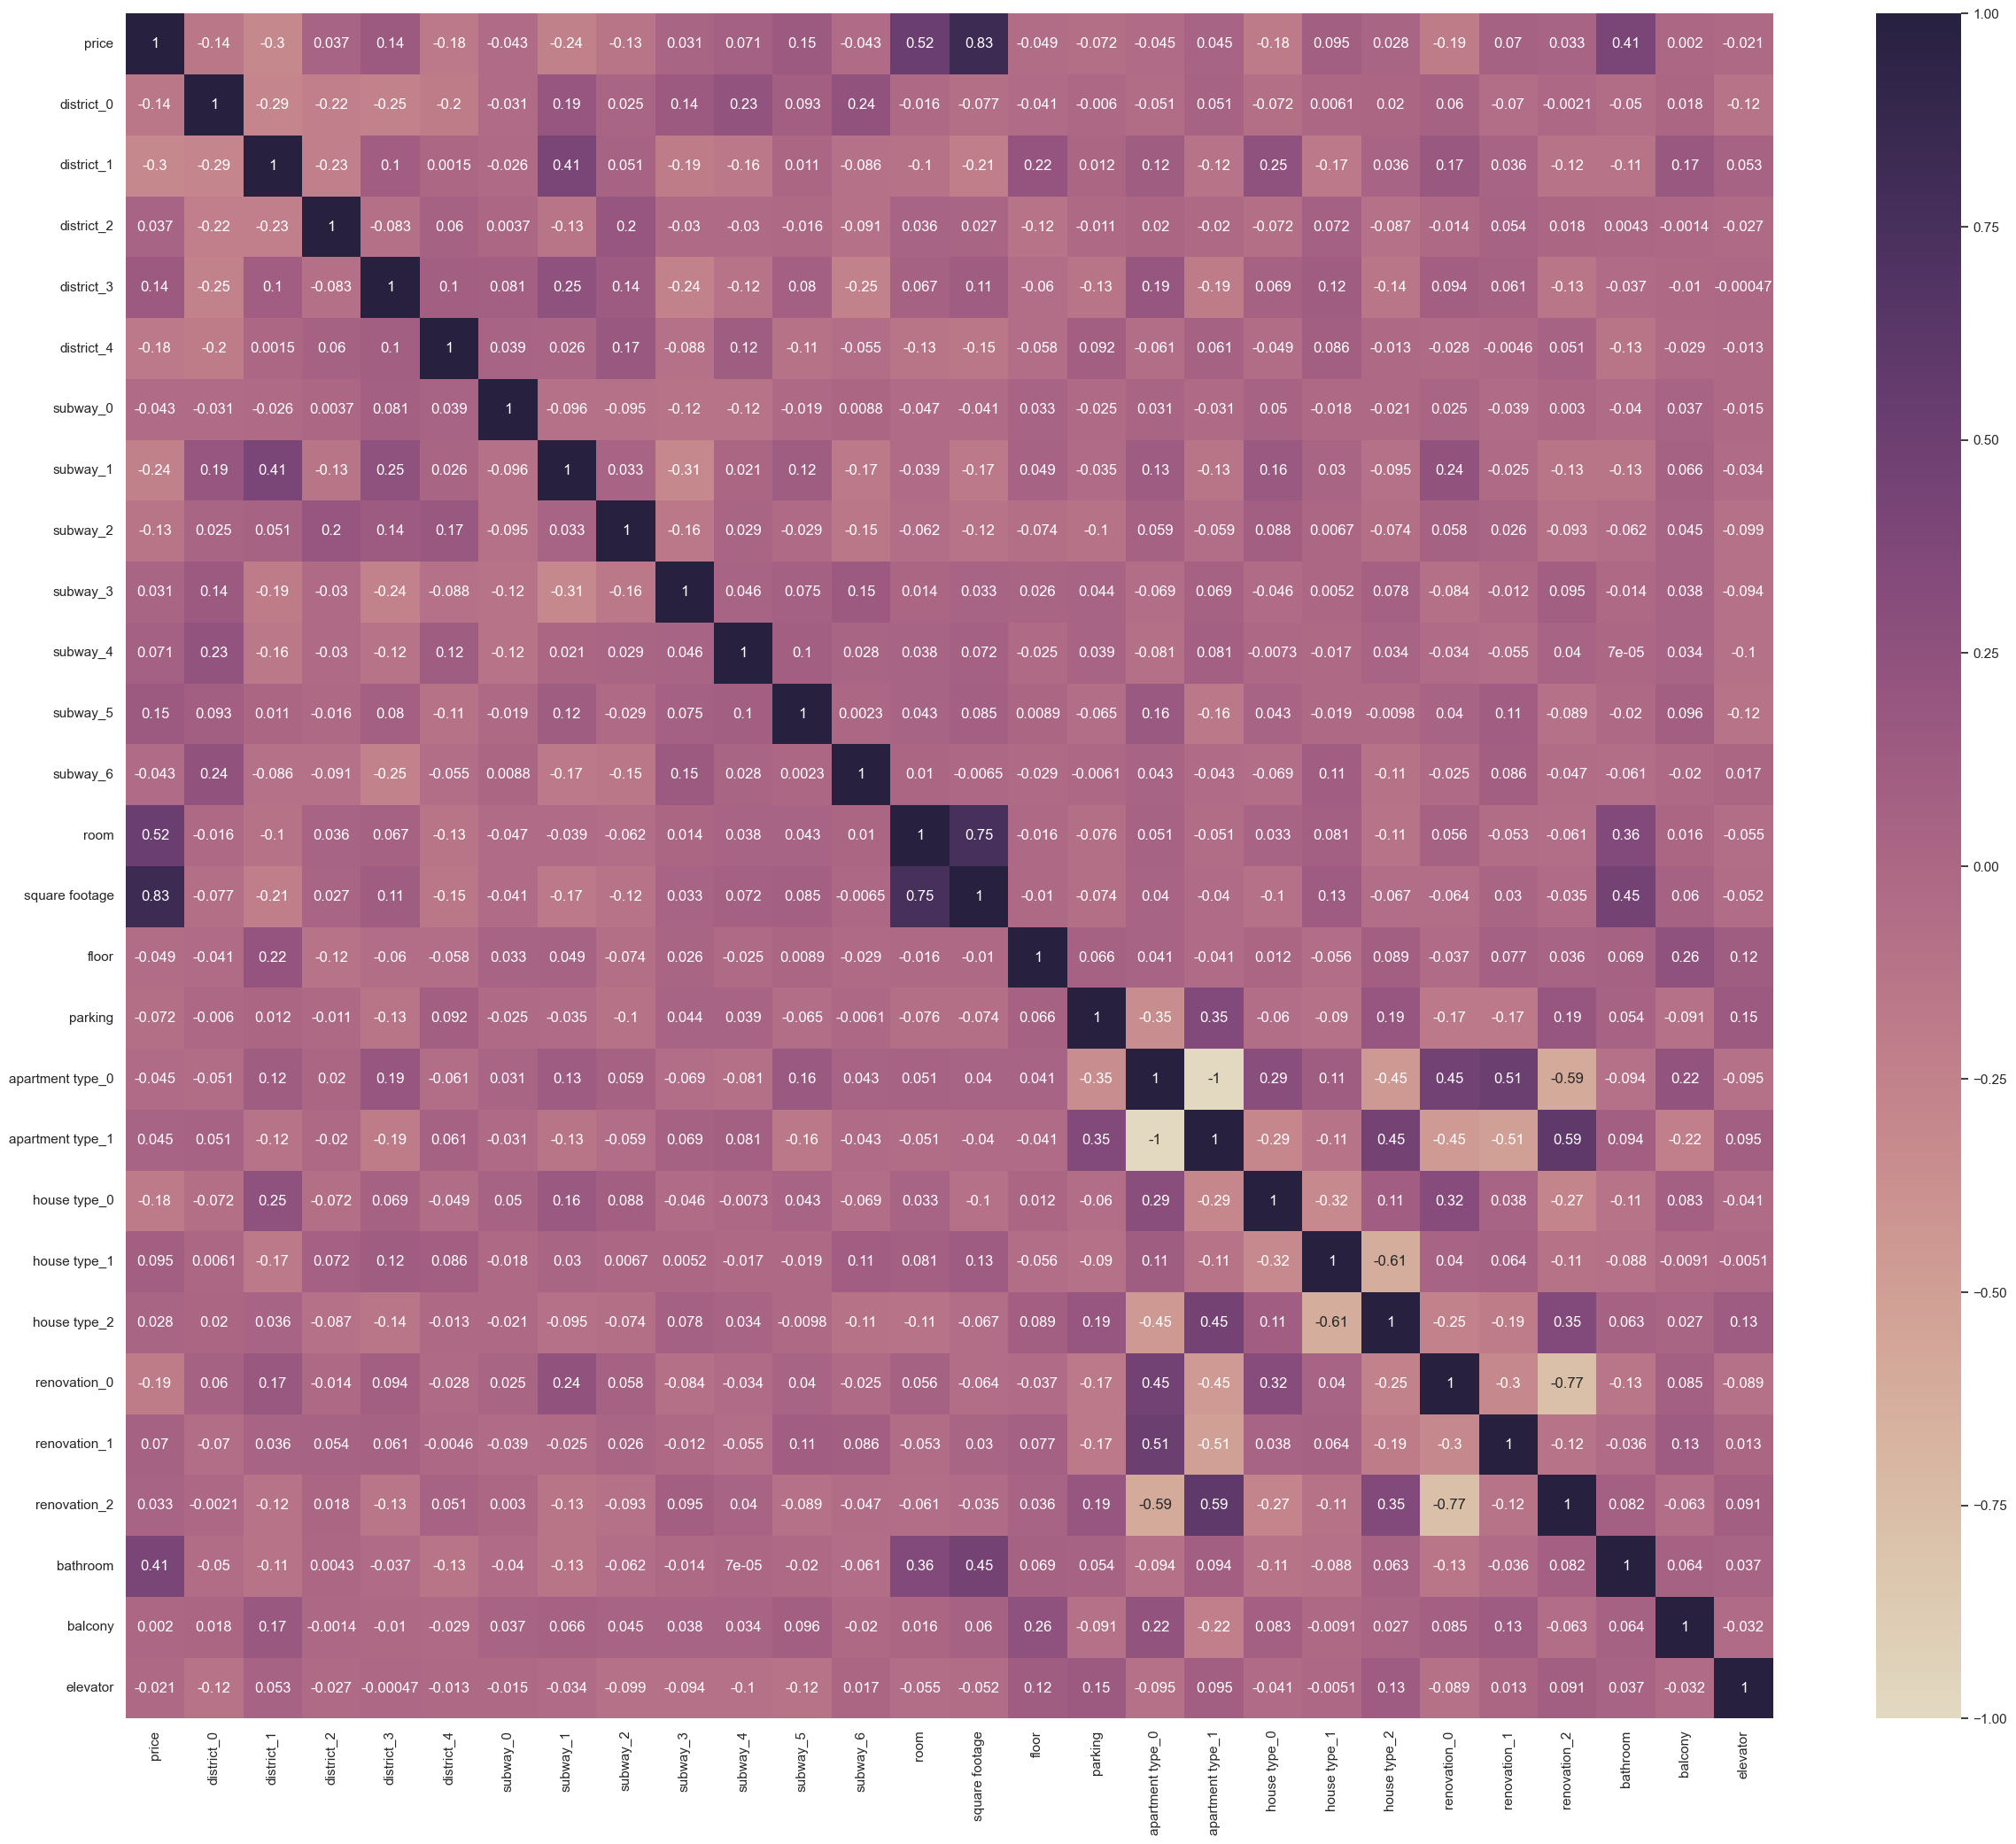

In [179]:
# correlation using heatmap
plt.figure(figsize = (30, 25))
sns.heatmap(df_lr.corr(), annot = True, cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))
plt.show()

Итоговая цена квартиры во многом зависит от количества комнат, общей площади, а также количества ванных, так как эти признаки имеют значение коэффициента корреляции $>0.4$, что свидетельствует о наличии линейной зависимости между признаком и таргетом.
Таким образом, главными факторами прогнозирования станут именно эти категориальные и численные переменные.